# Machine Learning / Aprendizagem Automática

## Sara C. Madeira, 2019/20

# ML Project  - Learning about Pet Adoption using PetFinder.my Dataset

## Dataset

The dataset to be analysed is **`PetFinder_dataset.csv`**, made avaliable together with this project description. This dataset, downloaded from [Kaggle](https://www.kaggle.com), contains selected data from the following competition: [PetFinder.my Adoption Prediction](https://www.kaggle.com/c/petfinder-adoption-prediction/). 

PetFinder.my has been Malaysia’s leading animal welfare platform since 2008, with a database of more than 150,000 animals. PetFinder collaborates closely with animal lovers, media, corporations, and global organizations to improve animal welfare. Animal adoption rates are strongly correlated to the metadata associated with their online profiles, such as descriptive text and photo characteristics. As one example, PetFinder is currently experimenting with a simple AI tool called the Cuteness Meter, which ranks how cute a pet is based on qualities present in their photos. In this competition data scientist are supposed to develop algorithms to predict the adoptability of pets - specifically, how quickly is a pet adopted? If successful, they will be adapted into AI tools that will guide shelters and rescuers around the world on improving their pet profiles' appeal, reducing animal suffering and euthanization. 

**In this project, your team is supposed to use only tabular data (not Images or Image Metadata) and see how far you can go in predicting and understanging PetFinder.my adoptions. You should use both supervised and unsupervised learning to tackled 2 tasks:**

1. **Task 1 (Supervised Learning) - Predicting Adoption and Adoption Speed**
2. **Task 2 (Unsupervised Learning) - Charactering Adopted Pets and Adoption Speed**

The **`PetFinder_dataset.csv`** you should learn from has **14.993 instances** described by **24 data fields** that you might use as **categorical/numerical features** and matches the `train.csv` file made available for the competition (https://www.kaggle.com/c/petfinder-adoption-prediction/data). **The target in the original Kaggle challenge is `Adoption Speed`.**

### File Descriptions

* **PetFinder_dataset.csv** - Tabular/text data for the training set
* **breed_labels.csv** - Contains Type, and BreedName for each BreedID. Type 1 is dog, 2 is cat.
* **color_labels.csv** - Contains ColorName for each ColorID
* **state_labels.csv** - Contains StateName for each StateID

### Data Fields

* **PetID** - Unique hash ID of pet profile (Not Used)
* **Type** - Type of animal (1 = Dog, 2 = Cat)
* **AdoptionSpeed - Categorical speed of adoption. Lower is faster.** This is the value to predict in the competition. See below section for more info.
* **Name** - Name of pet (Empty if not named)
* **Age** - Age of pet when listed, in months
* **Breed1** - Primary breed of pet (see `BreedLabels.csv` for details)
* **Breed2** - Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels dictionary)
* **Gender** - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)
* **Color1** - Color 1 of pet (see `ColorLabel.csv` for details)
* **Color2** - Color 2 of pet (see `ColorLabel.csv` for details)
* **Color3** - Color 3 of pet (see `ColorLabel.csv` for details)
* **MaturitySize** - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)*
* **FurLength** - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)*
* **Vaccinated** - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)
* **Dewormed** - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)
* **Sterilized** - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)
* **Health** - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified) 
* **Quantity** - Number of pets represented in profile*
* **Fee** - Adoption fee (0 = Free)*
* **State** - State location in Malaysia (Refer to StateLabels dictionary)
* **RescuerID** - Unique hash ID of rescuer (Not Used)
* **VideoAmt** - Total uploaded videos for this pet 
* **PhotoAmt** - Total uploaded photos for this pet
* **Description** - Profile write-up for this pet. The primary language used is English, with some in Malay or Chinese.

### AdoptionSpeed

The value of `AdoptionSpeed` describes how quickly, if at all, a pet is adopted:
* 0 - Pet was adopted on the same day as it was listed. 
* 1 - Pet was adopted between 1 and 7 days (1st week) after being listed. 
* 2 - Pet was adopted between 8 and 30 days (1st month) after being listed. 
* 3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.
* 4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).

### **Important Notes on Data Cleaning and Preprocessing**

   1. Data can contain **errors/typos**, whose correction might improve the analysis.
   2. Some features can contain **many values**, whose grouping in categories (aggregation into bins) might improve the analysis.
   3. Data can contain **missing values**, that you might decide to fill. You might also decide to eliminate instances/features with high percentages of missing values.
   4. **Not all features are necessarily important** for the analysis.
   5. Depending on the analysis, **some features might have to be excluded**.
   6. Class distribution is an important characteristic of the dataset that should be checked. **Class imbalance** might impair machine learning.  
  
Some potentially useful links:

* Data Cleaning and Preprocessing in Scikit-learn: https://scikit-learn.org/stable/modules/preprocessing.html#
* Data Cleaning and Preprocessing in Orange: https://docs.biolab.si//3/visual-programming/widgets/data/preprocess.html
* Dealing with imbalance datasets: https://pypi.org/project/imbalanced-learn/ and https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets#t7

## Task 0 (Know your Data) - Exploratory Data Analysis

## 0.1. Loading Data

In [12]:
# Load data
import pandas as pd

df = pd.read_csv("PetFinder_dataset.csv")


In [130]:
##Import all libraries
import sys
import numpy as np
import math
import pandas_profiling
from matplotlib import pyplot as plt
import seaborn as sns
from nltk import NaiveBayesClassifier as NBC
import nltk
import nltk.corpus
from nltk.stem import WordNetLemmatizer as lemmatizer
from nltk.corpus import stopwords
import plotly.graph_objects as go
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from scipy.cluster import hierarchy
from scipy.stats import spearmanr
from collections import defaultdict
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from mlxtend.preprocessing import TransactionEncoder
from imblearn.combine import SMOTETomek

#un comment to download for the first time
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

##All Functions
from EDA_fuctions import *
main_count = df['AdoptionSpeed'].value_counts(normalize=True).sort_index()

In [14]:
#dataset summary
df.describe()

Type           Age        Breed1        Breed2        Gender  \
count  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000   
mean       1.457614     10.452078    265.272594     74.009738      1.776162   
std        0.498217     18.155790     60.056818    123.011575      0.681592   
min        1.000000      0.000000      0.000000      0.000000      1.000000   
25%        1.000000      2.000000    265.000000      0.000000      1.000000   
50%        1.000000      3.000000    266.000000      0.000000      2.000000   
75%        2.000000     12.000000    307.000000    179.000000      2.000000   
max        2.000000    255.000000    307.000000    307.000000      3.000000   

             Color1        Color2        Color3  MaturitySize     FurLength  \
count  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000   
mean       2.234176      3.222837      1.882012      1.862002      1.467485   
std        1.745225      2.742562      2.984086      0.547959      0.599070   
min        1.000000      0.000000      0.000000      1.000000      1.000000   
25%        1.000000      0.000000      0.000000      2.000000      1.000000   
50%        2.000000      2.000000      0.000000      2.000000      1.000000   
75%        3.000000      6.000000      5.000000      2.000000      2.000000   
max        7.000000      7.000000      7.000000      4.000000      3.000000   

         Vaccinated      Dewormed    Sterilized        Health      Quantity  \
count  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000   
mean       1.731208      1.558727      1.914227      1.036617      1.576069   
std        0.667649      0.695817      0.566172      0.199535      1.472477   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        1.000000      1.000000      2.000000      1.000000      1.000000   
50%        2.000000      1.000000      2.000000      1.000000      1.000000   
75%        2.000000      2.000000      2.000000      1.000000      1.000000   
max        3.000000      3.000000      3.000000      3.000000     20.000000   

                Fee         State      VideoAmt      PhotoAmt  AdoptionSpeed  
count  14993.000000  14993.000000  14993.000000  14993.000000   14993.000000  
mean      21.259988  41346.028347      0.056760      3.889215       2.516441  
std       78.414548     32.444153      0.346185      3.487810       1.177265  
min        0.000000  41324.000000      0.000000      0.000000       0.000000  
25%        0.000000  41326.000000      0.000000      2.000000       2.000000  
50%        0.000000  41326.000000      0.000000      3.000000       2.000000  
75%        0.000000  41401.000000      0.000000      5.000000       4.000000  
max     3000.000000  41415.000000      8.000000     30.000000       4.000000

In [15]:
#dataset profilling
pandas_profiling.ProfileReport(df)

Only missing values are in Name and Description
Could be insert a global constant for each value, since the noun existence of this feature might be of importance for adoption speed.
Must breeds are zero, which should mean that it hasen't got breed

Only expected correlations (ex:color1-color2)

## 0.2. Understanding Data

In this task you should **understand better the features**, their distribution of values, potential errors, etc and plan/describe what data preprocessing steps should be performed next. Very important also is the distribution of values in the target (class distribution). 

Here you can find a notebook with some examples of what you can do in **Exploratory Data Analysis**: https://www.kaggle.com/artgor/exploration-of-data-step-by-step/notebook. You can also use Orange widgets for this.

### 0.2.1. Target

#### 0.2.1.1 Target - Adoption Speed

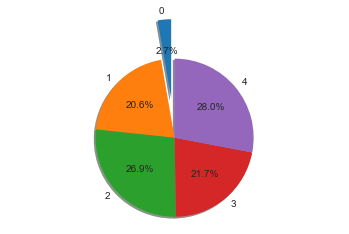

In [16]:
make_pie(df['AdoptionSpeed'])

There is imbalance on the target that needs to be corrected with over sampling and under sampling

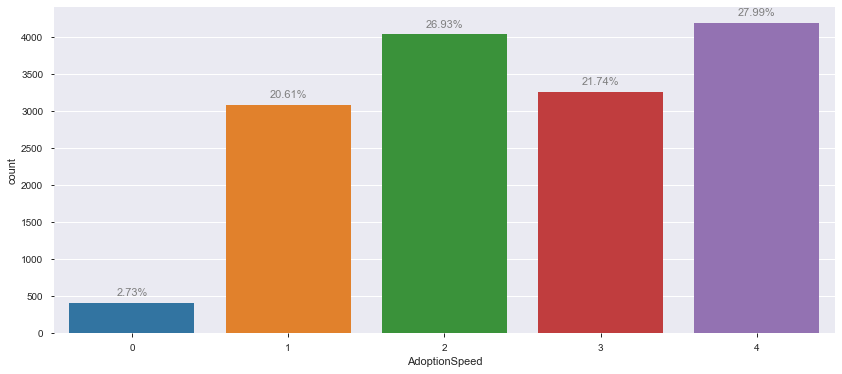

In [17]:
make_bar_chart(df['AdoptionSpeed'])

#### 0.2.1.2 Target - Adoption
* Not adopted = 0
* Adopted = 1

In [18]:
df['Adoption'] = 0 
df['Adoption'][df.AdoptionSpeed != 4] = 1


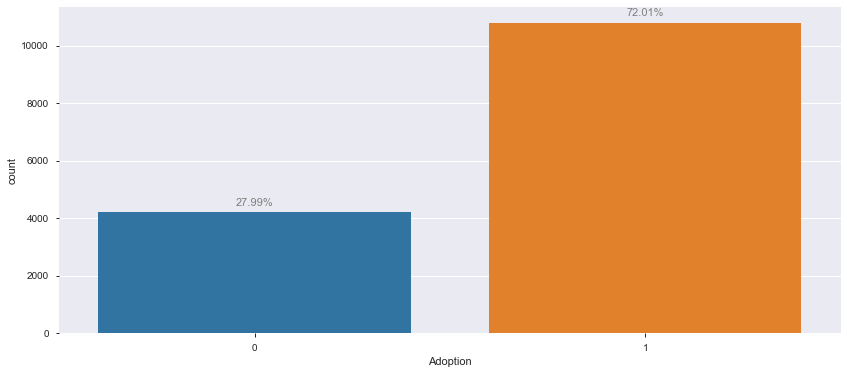

In [19]:
make_bar_chart(df['Adoption'])

### 0.2.2. Type

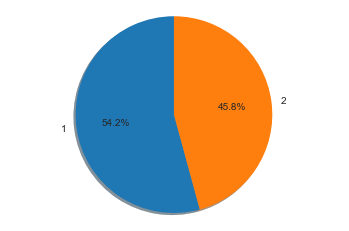

In [20]:
make_pie(df['Type'])

There isn't a great imbalence between cats and dogs in the dataset

<Figure size 1296x576 with 0 Axes>

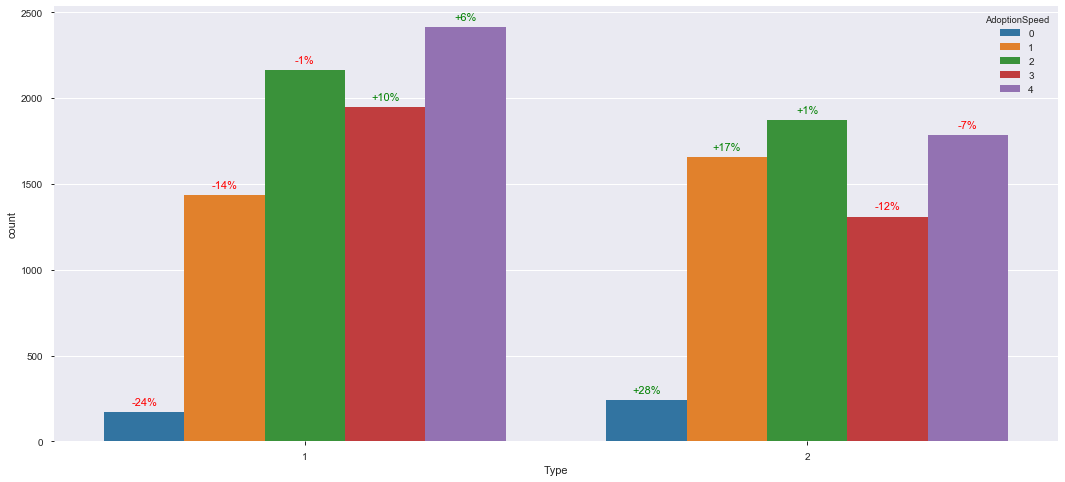

In [21]:
plt.figure(figsize=(18, 8));
make_count_plot(df=df, x='Type', main_count=main_count, title='by pet Type')

Cat's are likely to be adopted sooner them Dogs

In [22]:
#make_bar_stack(data=df,y='Adoption', x='Type');

### 0.2.3. Gender

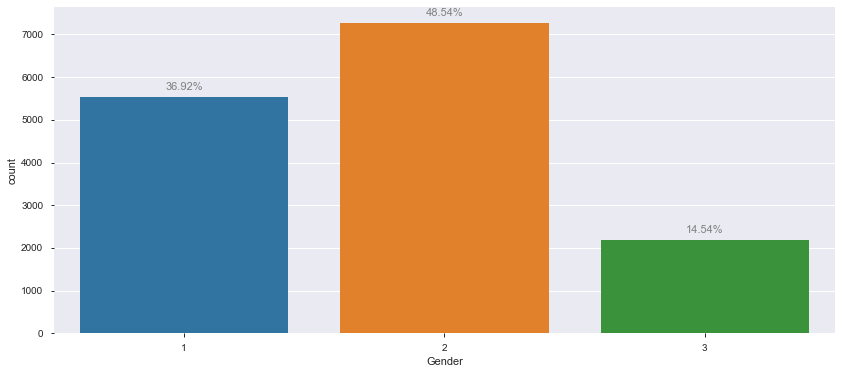

In [23]:
make_bar_chart(df['Gender'])

Gender Imbalance

<Figure size 1296x576 with 0 Axes>

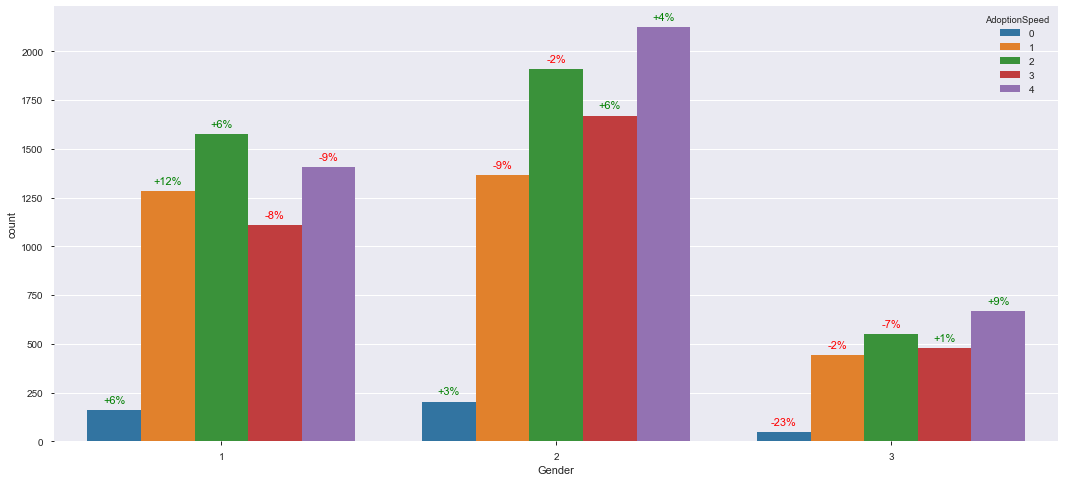

In [24]:
plt.figure(figsize=(18, 8));
make_count_plot(df=df, x='Gender', main_count=main_count, title='by pet Gender')

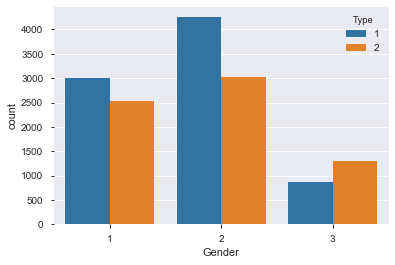

In [25]:
sns.countplot(x='Gender', data=df, hue='Type');

In [26]:
#make_bar_stack(data=df, x='Gender');


IndexError: list index out of range

### 0.2.4. Age

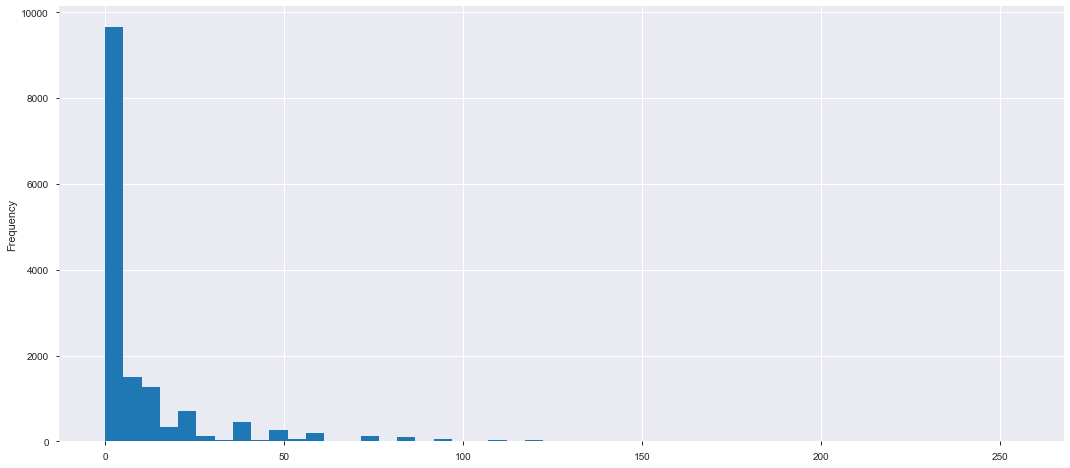

In [28]:
plt.figure(figsize=(18, 8));
df['Age'].plot(kind='hist', label='train', bins=50)

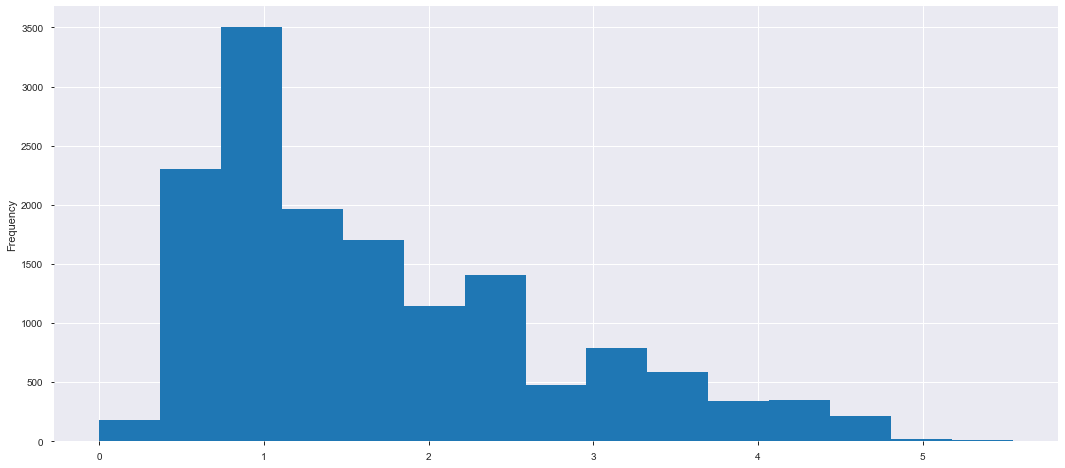

In [29]:
#Log
plt.figure(figsize=(18, 8));
np.log1p(df['Age']).plot('hist', label='train', bins=15)

In [30]:
#Create age categories
#Enconding
#0-1 = 0, 1-2 = 1, 2-4 = 2, 4-12 = 3, 12-inf = 4
#guarantee similar percentages in all categaries to balance age
df['agecat'] = pd.cut(df['Age'], [0, 1, 2, 4, 12,math.inf], include_lowest=True, labels=['0', '1', '2','3','4'])

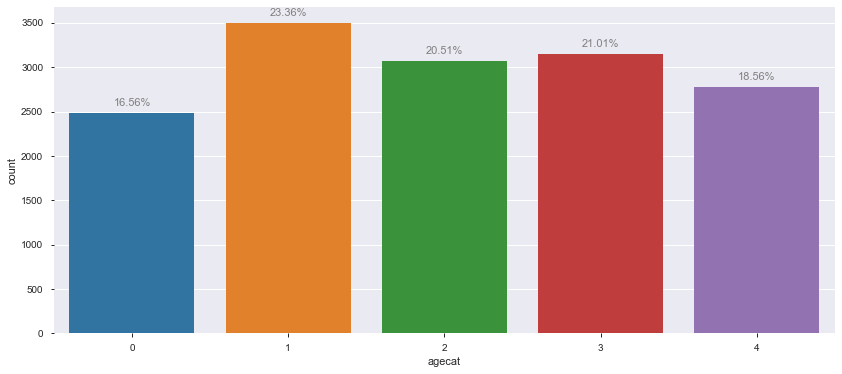

In [31]:
make_bar_chart(df['agecat'])

<Figure size 1296x576 with 0 Axes>

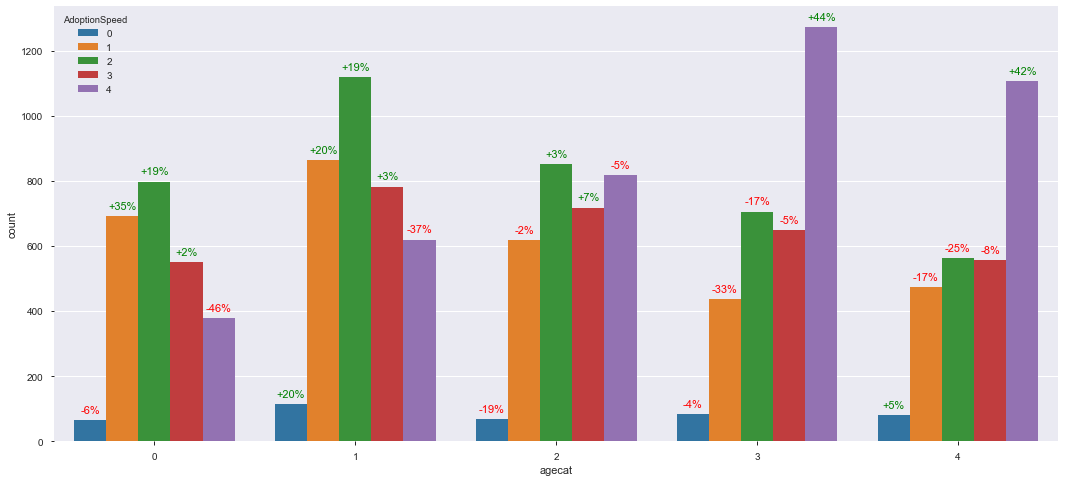

In [32]:
plt.figure(figsize=(18, 8));
make_count_plot(df=df, x='agecat', main_count=main_count, title='by pet Age')

Younger pets are more adopted

#### Original

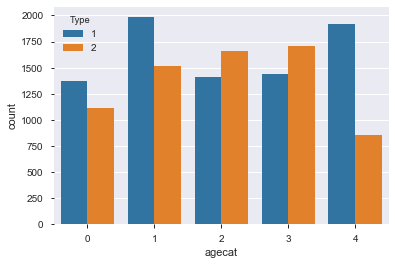

In [33]:
sns.countplot(x='agecat', data=df, hue='Type');

There is some imbalance in categories for types might need to be ajusted for individual type predictors
check categories with teacher

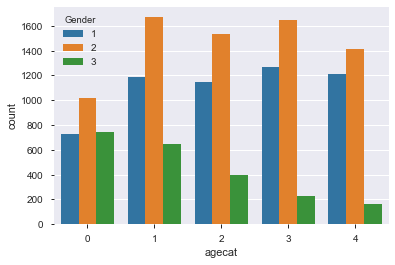

In [34]:
sns.countplot(x='agecat', data=df, hue='Gender');

Although there are less mixed gender's in agecat 0 they are all have similar counts, this might happen due to people's pets get pregnant and people can't keep the litter

### 0.2.5. Breed

In [35]:
#Load breed labels
breed_label = pd.read_csv('breed_labels.csv')
#Guarantee Uppercase
for i, breed in enumerate(breed_label['BreedName']):
    breed_label.loc[i, 'BreedName'] = breed.upper()

In [36]:
#Load Fci official dog breeds
fci_dog =  pd.read_csv('dog_fci.csv')
#Check non-breeds in dogs
breed_label_dogs = breed_label[breed_label.Type == 1]
not_breeds_dog = breeds_check(np.array(breed_label_dogs['BreedName']), np.array(fci_dog['name']))
not_breeds_dog

['AKBASH',
 'BEAUCERON',
 'BOERBOEL',
 'CAROLINA DOG',
 'CATAHOULA LEOPARD DOG',
 'CHINOOK',
 'COCKAPOO',
 'ENTLEBUCHER',
 'FEIST',
 'KEESHOND',
 'LOWCHEN',
 'MCNAB',
 'PAPILLON',
 'POMERANIAN',
 'SARPLANINAC',
 'XOLOITZCUINTLE/MEXICAN HAIRLESS',
 'MIXED BREED']

We now have to deal with typos and breeds that might not be official, and aliases
After a quick google search it checks out that all dog breeds exist with the exception of 'MIXED BREED' an alias for a mutt

In [37]:
#Load CFA official cat breeds
cfa_cat =  pd.read_csv('cat_cfa.csv')
cfa_cat = np.array(cfa_cat['name'])
for i, breed in enumerate(cfa_cat):
    cfa_cat[i] = breed.upper()
#Check non-breeds in cats
breed_label_cats = breed_label[breed_label.Type == 2]
not_breeds_cat = breeds_check(np.array(breed_label_cats['BreedName']), cfa_cat)
not_breeds_cat

['CALICO',
 'CANADIAN HAIRLESS',
 'CHAUSIE',
 'CHINCHILLA',
 'CYMRIC',
 'DILUTE CALICO',
 'DILUTE TORTOISESHELL',
 'DOMESTIC LONG HAIR',
 'DOMESTIC MEDIUM HAIR',
 'EXTRA-TOES CAT (HEMINGWAY POLYDACTYL)',
 'HIMALAYAN',
 'JAVANESE',
 'MUNCHKIN',
 'NEBELUNG',
 'PIXIE-BOB',
 'SILVER',
 'SNOWSHOE',
 'TABBY',
 'TIGER',
 'TORBIE',
 'TORTOISESHELL',
 'TUXEDO']

In cat breeds their are several non-breeds:

- Descriptions: 
 * 'DOMESTIC LONG HAIR'
 * 'DOMESTIC MEDIUM HAIR'
 * 'EXTRA-TOES CAT (HEMINGWAY POLYDACTYL)'
- Fur colors or patterns: 
 * 'SILVER'
 * 'TABBY'
 * 'TIGER'
 * 'TORBIE'
 * 'TORTOISESHELL'

In [38]:
non_breeds = [
 'DOMESTIC LONG HAIR',
 'DOMESTIC MEDIUM HAIR',
 'EXTRA-TOES CAT (HEMINGWAY POLYDACTYL)',
 'SILVER',
 'TABBY',
 'TIGER',
 'TORBIE',
 'TORTOISESHELL',
 'MIXED BREED']

Now let's create a new Breed Feature (breedcat):
- Encoding:
 * 0 - No_Breed
 * 1 - Mixed
 * 2 - Pure_Breed

In [39]:
#Set class as 2
df['breedcat'] = [2 for i in range(len(df))]
#Change if mixed
#for i in range(len(df)):
#    if df.loc[i, 'Breed1'] != df.loc[i, 'Breed2'] and df.loc[i, 'Breed2'] != 0:
#        df.loc[i, 'breedcat'] = 1
#get No_Bree's Id
non_breedf = breed_label[breed_label.BreedName.isin(non_breeds)]
non_breed = np.array(non_breedf['BreedID'])
#Change if No_Breed
for i in range(len(df)):
    if df.loc[i, 'Breed1'] in non_breed or df.loc[i, 'Breed2'] in non_breed:
        df.loc[i, 'breedcat'] = 0

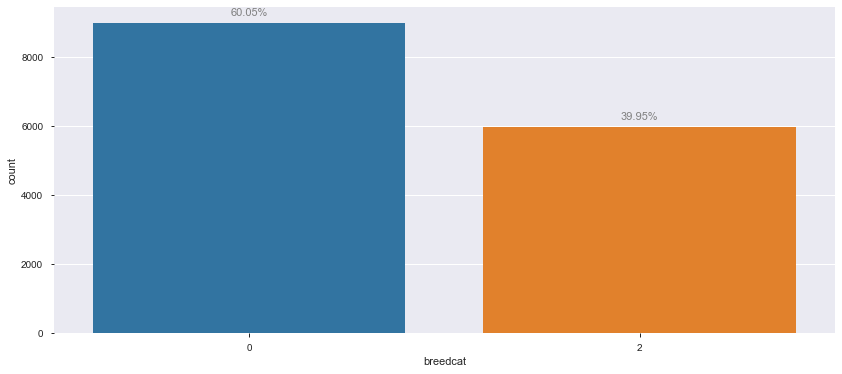

In [40]:
make_bar_chart(df['breedcat'])

<Figure size 1296x576 with 0 Axes>

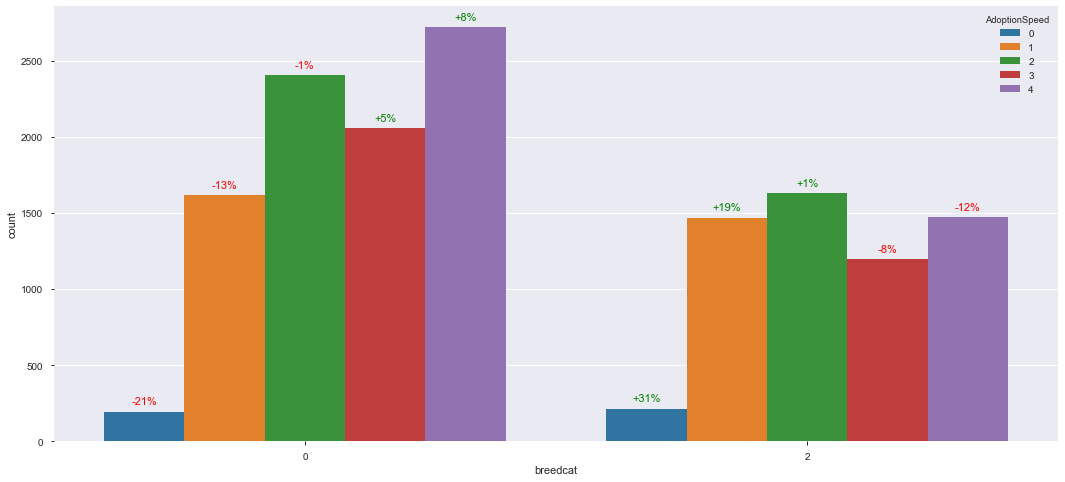

In [41]:
plt.figure(figsize=(18, 8));
make_count_plot(df=df, x='breedcat', main_count=main_count, title='by pet breed')

Seems animals with a breed are adopted faster

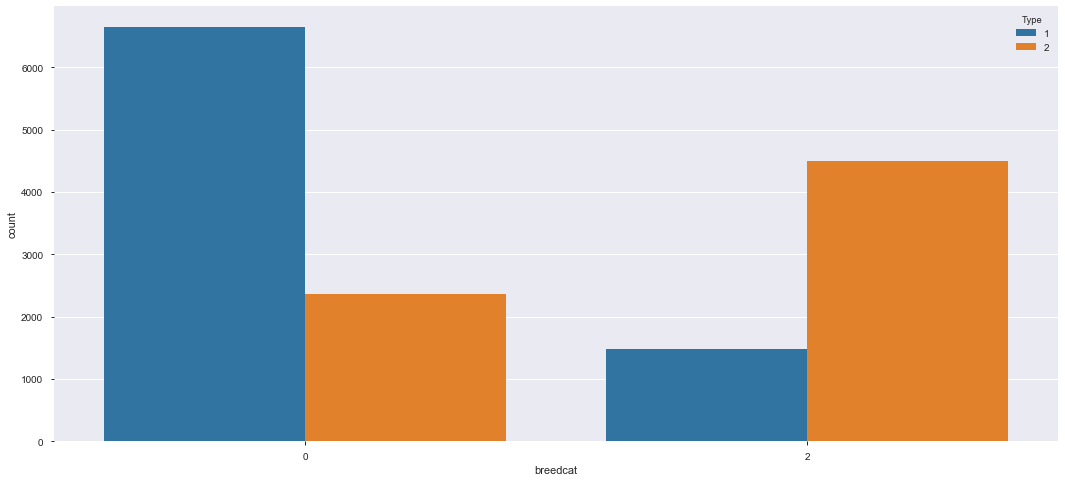

In [42]:
plt.figure(figsize=(18, 8));
sns.countplot(x='breedcat', data=df, hue='Type')

### 0.2.6. Name

In [43]:
df['Name'].value_counts().head()

Baby       66
Lucky      64
No Name    54
Brownie    54
Mimi       52
Name: Name, dtype: int64

So there are quite some names that aren't really names let's try to tell them appart

In [44]:
#list of proibided strings
prb = ['KITT', 'PUPPY', 'DOG', 'MALE', 'FEMALE','FOR', 'NO NAME', 'NAN', 'BOY', 'GIRL']
names = []
for i, name in enumerate(df['Name']):
        if is_number(name) is True or name.isdigit() is True:
            names.append(i)
        else:
            name = name.upper()
            if len(name) <3 or any(string in name for string in prb)  or any(char.isdigit() for char in name):
                names.append(i)

In [45]:
#Set class as 2
df['namecat'] = [1 for i in range(len(df))]
df.loc[names,'namecat'] = 0

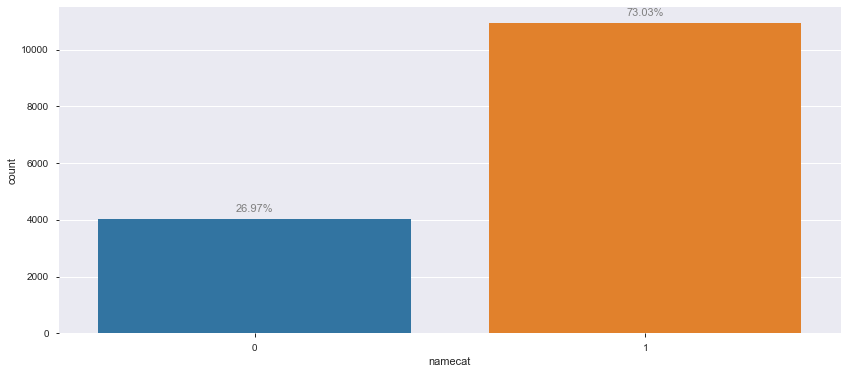

In [46]:
make_bar_chart(df['namecat'])

<Figure size 1296x576 with 0 Axes>

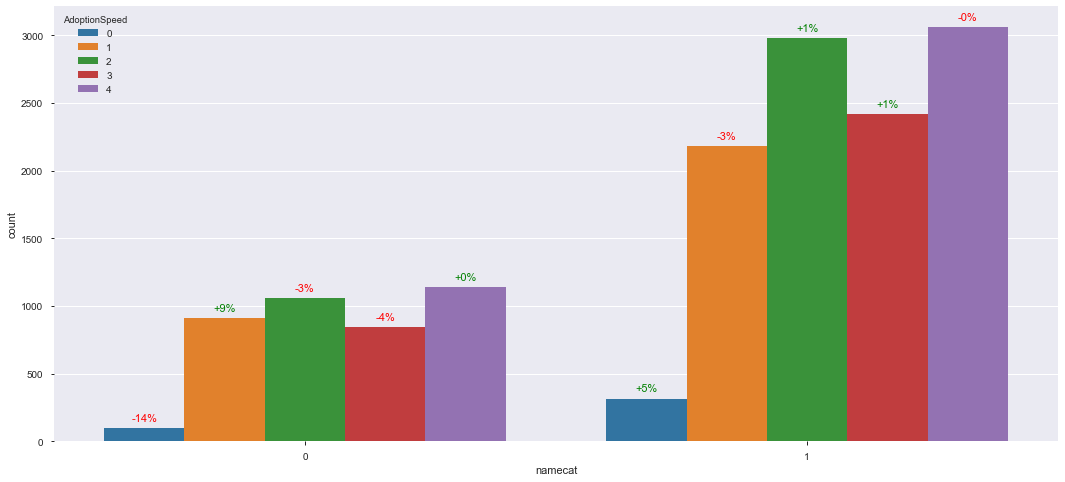

In [47]:
plt.figure(figsize=(18, 8));
make_count_plot(df=df, x='namecat', main_count=main_count, title='by pet name')

We don't see a big diference between this class's, let's see diff of name vs no_name

In [48]:
#list of proibided strings
prb = ['NO NAME']
names = []
for i, name in enumerate(df['Name']):
        if is_number(name) is True or name.isdigit() is True:
            continue
        name = name.upper()
        if any(string in name for string in prb):
            names.append(i)

In [49]:
#Set
df['namecat'] = [1 for i in range(len(df))]
df.loc[names,'namecat'] = 0

<Figure size 1296x576 with 0 Axes>

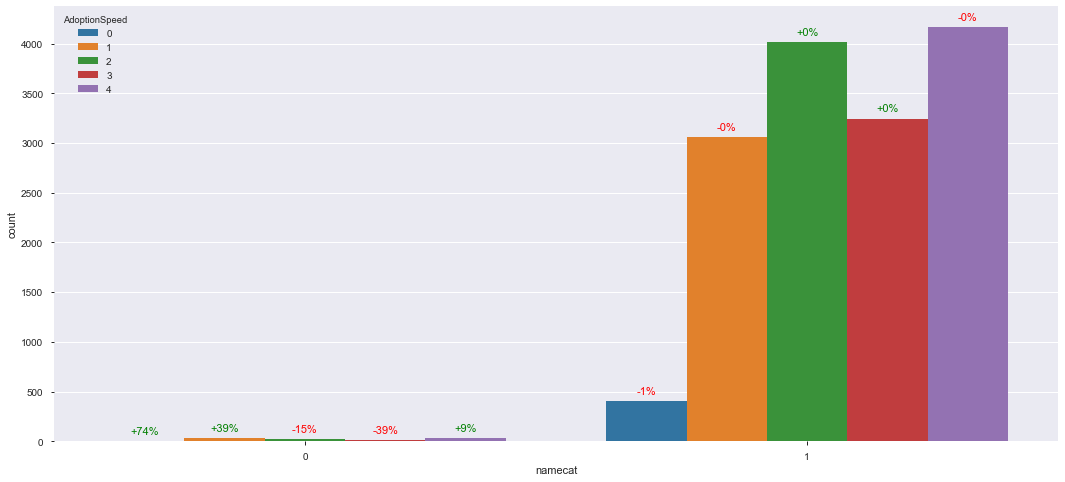

In [50]:
plt.figure(figsize=(18, 8));
make_count_plot(df=df, x='namecat', main_count=main_count, title='by pet name')

This way it's seems that no_name as more probability of being choose? Probably because no name means young age

In [51]:
df['namecat'] = [2 for i in range(len(df))]
prb = ['KITT', 'PUPPY', 'DOG', 'MALE', 'FEMALE','FOR', 'NO NAME', 'NAN', 'BOY', 'GIRL']
names = []
for i, name in enumerate(df['Name']):
        if is_number(name) is True or name.isdigit() is True:
            names.append(i)
        else:
            name = name.upper()
            if len(name) <3 or any(string in name for string in prb)  or any(char.isdigit() for char in name):
                names.append(i)
df.loc[names,'namecat'] = 0

In [52]:
temp = df['Name'].value_counts()[:100]
names2 = []
for i, name in enumerate(df['Name']):
    if name in temp:
        names2.append(i)
df.loc[names2, 'namecat'] = 1


<Figure size 1296x576 with 0 Axes>

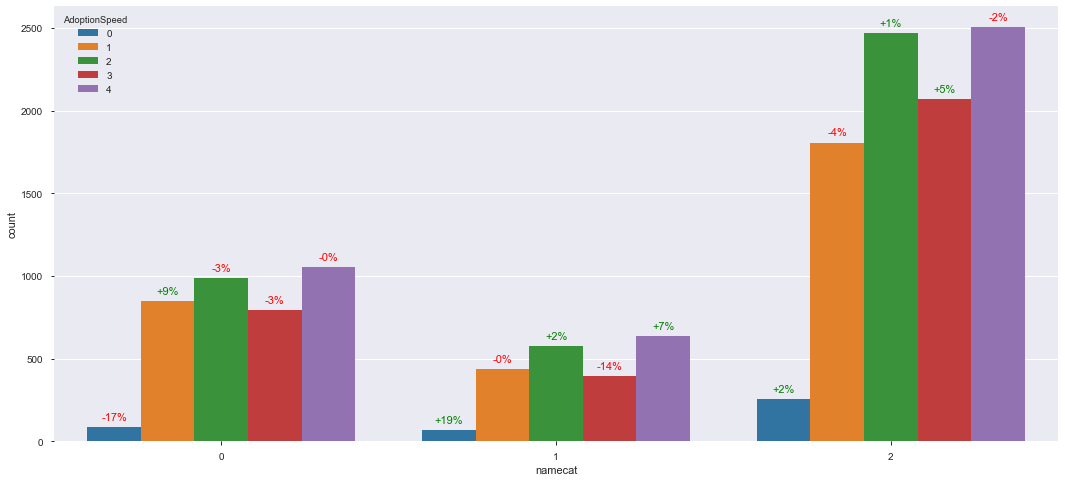

In [53]:
plt.figure(figsize=(18, 8));
make_count_plot(df=df, x='namecat', main_count=main_count, title='by pet name')

a-z cat ranges

In [54]:
df['namecat'] = 0
df.loc[ab_range('a','h', df, 'Name'), 'namecat'] = 1
df.loc[ab_range('i','r', df, 'Name'), 'namecat'] = 2
df.loc[ab_range('s','z', df, 'Name'), 'namecat'] = 3

<Figure size 1296x576 with 0 Axes>

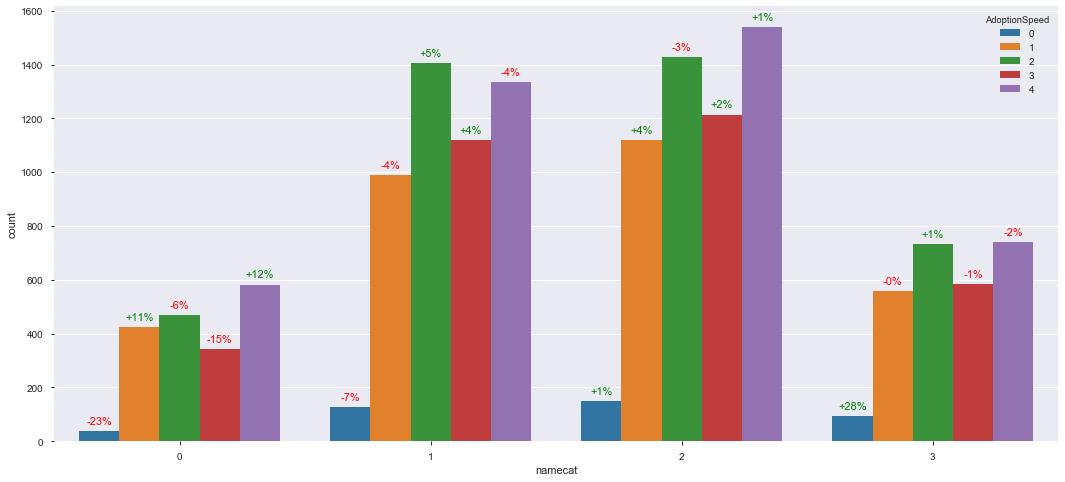

In [55]:
plt.figure(figsize=(18, 8));
make_count_plot(df=df, x='namecat', main_count=main_count, title='by pet name')

NLP Aproach

In [56]:
#Generate Features dataset
labeled_names = []

for i in range(len(df)):
    labeled_names.append((df.loc[i ,'Name'], df.loc[i,'Adoption']))

featuresets = [(name_features(str(n)), name) for (n, name) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]

In [57]:
#Train classifier
classifier = NBC.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.7


In [58]:
#Make predictions
pred = []
for feat in df['Name']:
    pred.append(classifier.classify(name_features(str(feat))))
    
#check if both classes are being predicted
pred_check(pred, 2)

True

In [59]:
#Show main features
classifier.show_most_informative_features(5)

Most Informative Features
                count(j) = 4                   0 : 1      =      4.3 : 1.0
                count(w) = 4                   0 : 1      =      3.6 : 1.0
                count(r) = 5                   1 : 0      =      3.5 : 1.0
                count(i) = 5                   0 : 1      =      3.3 : 1.0
                count(s) = 6                   0 : 1      =      2.6 : 1.0


Usar resultados do classificador diretamente? riscos overfitting, alternativa generalizar regras

- count(j) = 4                   
  * 0 : 1      =      4.3 : 1.0
- count(k) = 3                  
  * 1 : 0      =      4.0 : 1.0
- count(i) = 5                   
  * 0 : 1      =      3.3 : 1.0
- count(r) = 5                   
  * 1 : 0      =      2.7 : 1.0
- count(v) = 3                   
  * 0 : 1      =      2.6 : 1.0
- count(h) = 3                   
  * 1 : 0      =      1.9 : 1.0

In [60]:
#scoring 
names = []
for i, name in enumerate(df['Name']):
    score = 0
    temp = name_features(str(name))
    score -= 1.075 * temp['count(j)']
    score += 1.33 * temp['count(k)']
    score -= 0.66 * temp['count(i)']
    score += 0.54 * temp['count(r)']
    score -= 0.20 * temp['count(v)']
    if score > 0:
        names.append(i)
df['namecat'] = 0
df.loc[names, 'namecat'] = 1
    

<Figure size 1296x576 with 0 Axes>

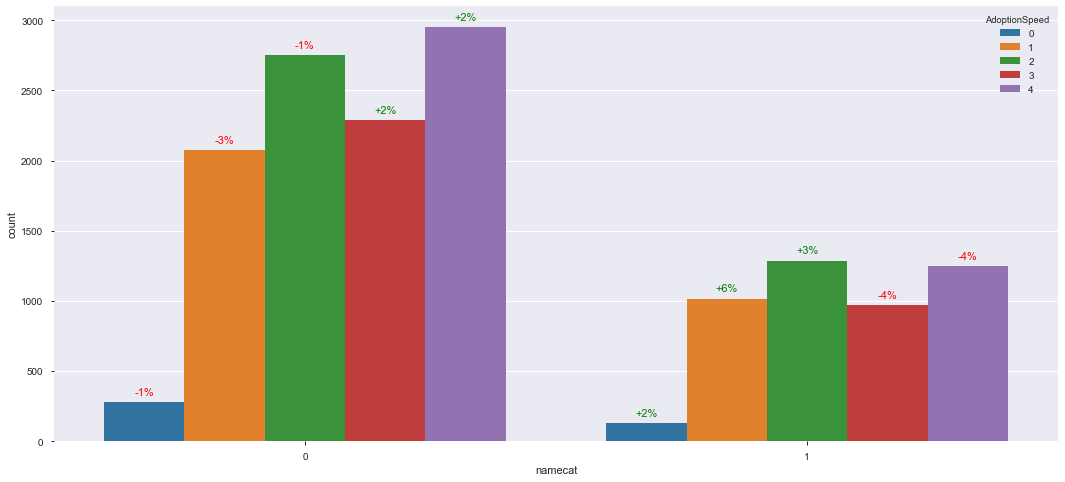

In [61]:
#Plot
plt.figure(figsize=(18, 8));
make_count_plot(df=df, x='namecat', main_count=main_count, title='by pet name')

### 0.2.7. Description

In [62]:
#NLTK Aproach
#import lists
tagset = pd.read_csv("tags.csv")
stop = set(stopwords.words('english'))
#get all tokens
all_tokens = nltk.FreqDist(lemmatizer.lemmatize(lemmatizer,w.lower()) for desc in df['Description'] \
                           for w in nltk.word_tokenize(str(desc)) if w not in stop)

In [63]:
#Top x tokens
all_tokens.most_common(20)

[('.', 64407),
 (',', 30124),
 ('i', 10275),
 ('home', 7971),
 (')', 7775),
 ('dog', 6295),
 (':', 6253),
 ('cat', 6068),
 ('she', 5792),
 ('please', 5702),
 ('(', 5409),
 ('!', 5012),
 ('kitten', 4543),
 ('love', 4420),
 ('he', 4412),
 ('puppy', 4099),
 ('adoption', 3982),
 ("'s", 3899),
 ('--', 3776),
 ('good', 3525)]

In [64]:
#Generate feature dataset
labeled_names = []
for i in range(len(df)):
    labeled_names.append((df.loc[i ,'Description'], df.loc[i,'Adoption']))
featuresets = [(document_features(str(n),stop,tagset), adopted) for (n, adopted) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]

In [65]:
#Train classifier
classifier = NBC.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.654


In [66]:
#make predictions
pred = []
for feat in df['Name']:
    pred.append(classifier.classify(document_features(str(feat),stop,tagset)))
#check if all classes are being predicted
pred_check(pred, 2)

True

In [67]:
#Show top features
classifier.show_most_informative_features()

Most Informative Features
              count(SYM) = 4                   0 : 1      =      9.5 : 1.0
               count(DT) = 5                   1 : 0      =      7.2 : 1.0
               count(NN) = 97                  0 : 1      =      7.1 : 1.0
               count(CD) = 20                  0 : 1      =      6.3 : 1.0
               count(VB) = 17                  0 : 1      =      6.3 : 1.0
               count(CC) = 13                  0 : 1      =      6.0 : 1.0
               count(JJ) = 42                  0 : 1      =      5.3 : 1.0
               count(CD) = 11                  1 : 0      =      5.3 : 1.0
              count(PRP) = 9                   1 : 0      =      4.9 : 1.0
              count(WRB) = 3                   0 : 1      =      4.6 : 1.0


In [68]:
#Get top features
with Capturing() as outputs:
    classifier.show_most_informative_features(100)
contains = []
for output in outputs:
    i = output.find('(')
    if i == -1: continue
    if int(output[47]) == 1:
        contains.append([output[i+1:23], int(output[27:30]), float(output[-9:68])*2])
    else:
        contains.append([output[i+1:23], int(output[27:30]), -float(output[-9:68])])

In [69]:
#scoring 
docs = []
for i, doc in enumerate(df['Description']):
    score = 0
    features = document_features(str(doc),stop,tagset)
    for tags in contains:
        if ("'count({})'".format(tags[0]) +': '+str(tags[1])) in str(features):
                score += tags[2]
    if score > 0:
        docs.append(i)

df['descriptcat'] = 0
df.loc[docs, 'descriptcat'] = 1

In [70]:
#Cat 1 count percentage
print(round(len(docs)/len(df)*100,2), '%')

10.58 %


<Figure size 1296x576 with 0 Axes>

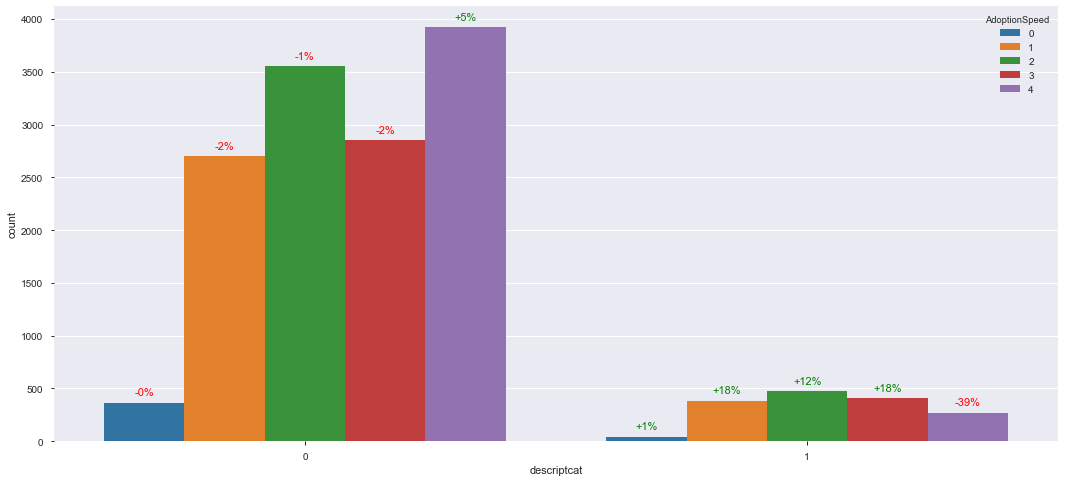

In [71]:
plt.figure(figsize=(18, 8));
make_count_plot(df=df, x='descriptcat', main_count=main_count, title='by pet description')

### 0.2.8. Color

Division in 3 classes:
   
* 0 - unicolor;
* 1 - bicolor;
* 2 - tricolor;

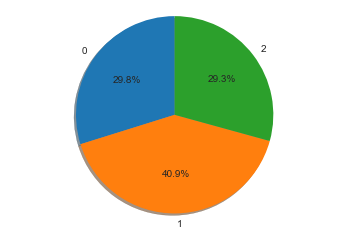

In [72]:
df['colorcat'] = 0
df.loc[df.Color2 != 0, 'colorcat'] = 1
df.loc[df.Color3 != 0, 'colorcat'] = 2
make_pie(df['colorcat'])

<Figure size 1296x576 with 0 Axes>

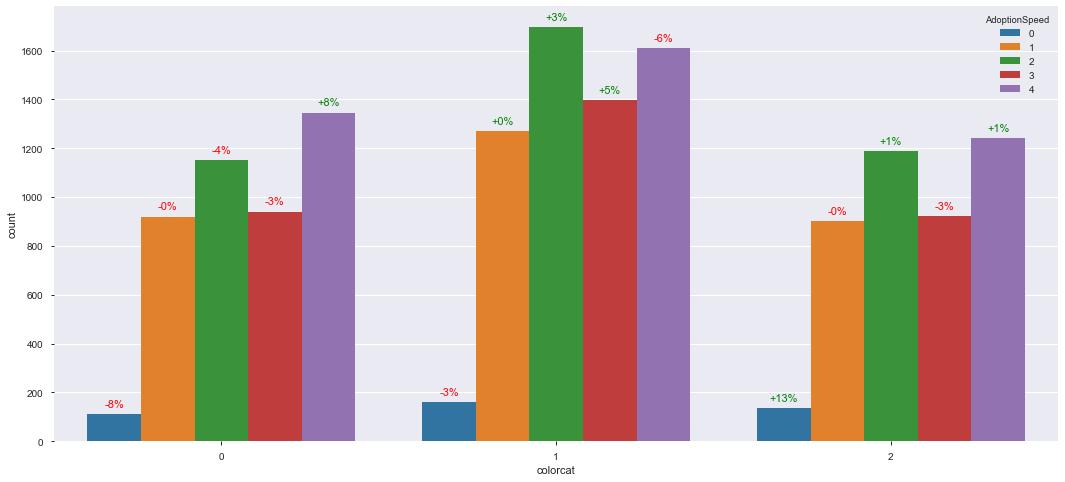

In [73]:
plt.figure(figsize=(18, 8));
make_count_plot(df=df, x='colorcat', main_count=main_count, title='by pet color')

Well balanced, but dosen't discriminate target very well, and implies data loss.

Let's add a second color category, using a rule based model for feature engineering




In [74]:
#Create transactions
df['colortrX'] = [[] for x in range(len(df))]
colorlist = ['Color1', 'Color2', 'Color3']
colorlabel = pd.read_csv("color_labels.csv")

for x in range(len(df)):
    for color in colorlist:
        if df.loc[x, color] != 0:
            df.loc[x, 'colortrX'].append(str(list(colorlabel.loc[colorlabel.ColorID == df.loc[x, color], 'ColorName'])).strip("['']"))
        if df.loc[x, 'Adoption'] == 1:
            df.loc[x, 'colortrX'].append('Adoption')

In [75]:
#Compute binary database
TxE = TransactionEncoder()
te_ary = TxE.fit(df['colortrX']).transform(df['colortrX'])
binary_database = pd.DataFrame(te_ary, columns=TxE.columns_)
binary_database

Adoption  Black  Brown  Cream  Golden   Gray  White  Yellow
0          True   True  False  False   False  False   True   False
1          True   True   True  False   False  False  False   False
2          True  False   True  False   False  False   True   False
3          True   True   True  False   False  False  False   False
4          True   True  False  False   False  False  False   False
...         ...    ...    ...    ...     ...    ...    ...     ...
14988      True   True  False  False   False  False  False   False
14989     False   True  False  False   False  False   True    True
14990      True  False  False   True   False   True   True   False
14991     False  False  False  False   False  False   True    True
14992      True  False   True  False   False  False  False   False

[14993 rows x 8 columns]

In [76]:
from mlxtend.frequent_patterns import apriori
#Compute itemsets
frequent_itemsets = apriori(binary_database, min_support=0.3, use_colnames=True)
frequent_itemsets

support           itemsets
0  0.720069         (Adoption)
1  0.495365            (Black)
2  0.471087            (Brown)
3  0.488628            (White)
4  0.356166  (Adoption, Black)
5  0.333889  (Brown, Adoption)
6  0.357967  (White, Adoption)

In [77]:
from mlxtend.frequent_patterns import association_rules
# Compute association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules

antecedents consequents  antecedent support  consequent support   support  \
0     (Black)  (Adoption)            0.495365            0.720069  0.356166   
1     (Brown)  (Adoption)            0.471087            0.720069  0.333889   
2     (White)  (Adoption)            0.488628            0.720069  0.357967   

   confidence      lift  leverage  conviction  
0    0.718998  0.998512 -0.000531    0.996188  
1    0.708764  0.984300 -0.005326    0.961181  
2    0.732596  1.017397  0.006121    1.046846

If lift is one, that means there is independence between the features, when lift is more or less then one that means the relationship is positive or negative respectivly.

In this case we can say that Black and Brown colors are more likely to not be adopted, and white is more likely to be adopted.

In [78]:
colorlabel 

ColorID ColorName
0        1     Black
1        2     Brown
2        3    Golden
3        4    Yellow
4        5     Cream
5        6      Gray
6        7     White

So we separate all the colors from black and brown, creating to categories

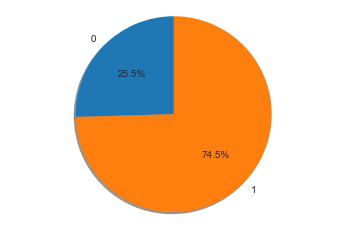

In [79]:
df['colorcat2'] = 0
df.loc[df.Color1 == 1, 'colorcat2'] = 1
df.loc[df.Color1 == 2, 'colorcat2'] = 1
make_pie(df['colorcat2'])

This pie shows us that there is some imbalance in the two categories

<Figure size 1296x576 with 0 Axes>

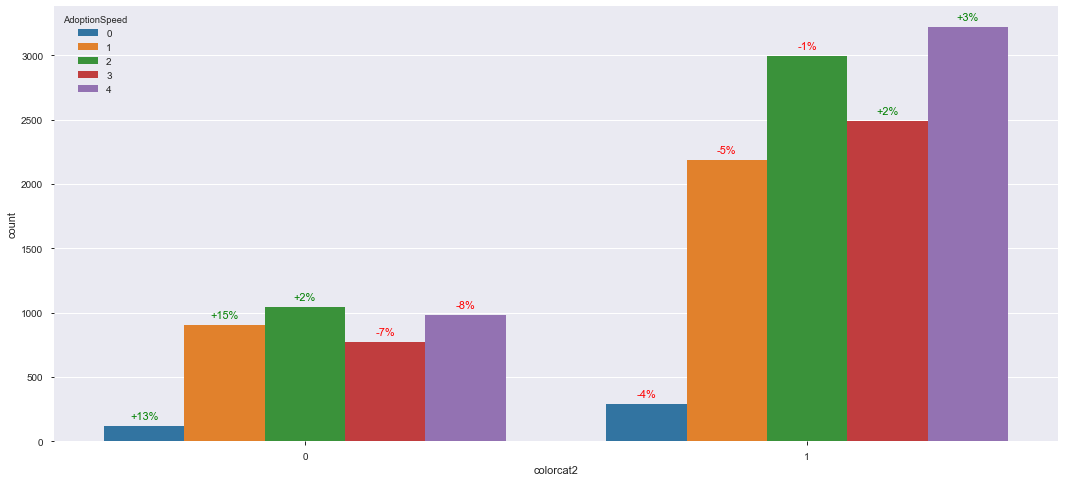

In [80]:
plt.figure(figsize=(18, 8));
make_count_plot(df=df, x='colorcat2', main_count=main_count, title='by pet color')

As expected we can discriminate very well, between adopted and not adopted.

We see that pets with black or brown in their colors are less likely to be adopted

### 0.2.9 Health

Plot Health features to see how they vary with adoption speed

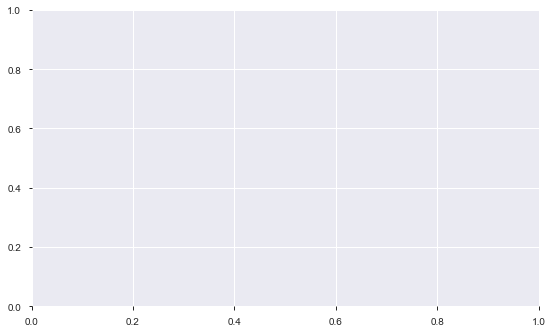

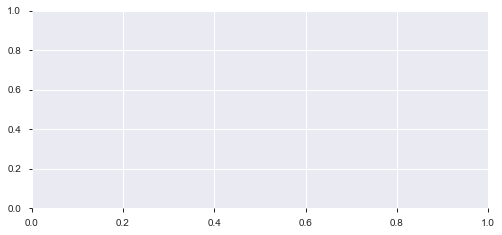

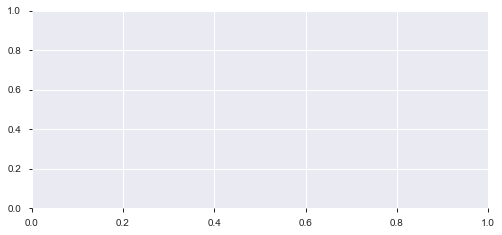

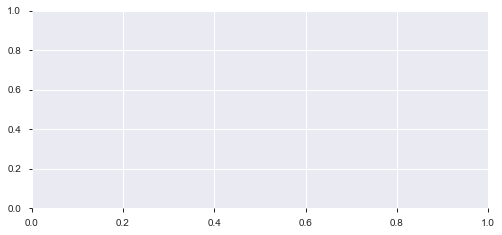

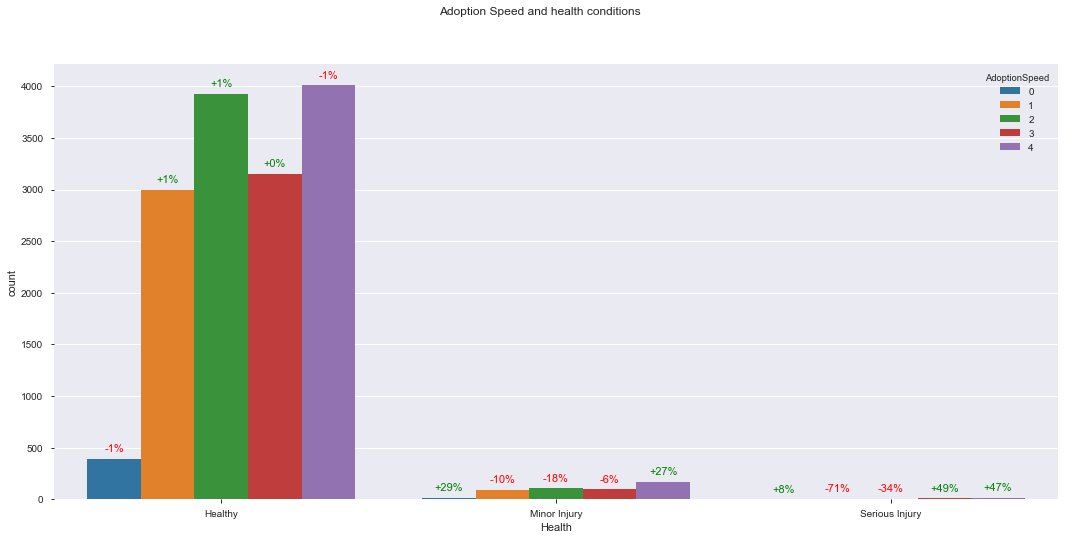

In [135]:
plt.figure(figsize=(20, 12));
plt.subplot(2, 2, 1)
make_count_plot(df=df,main_count=main_count, x='Vaccinated', title='Vaccinated')
plt.xticks([0, 1, 2], ['Yes', 'No', 'Not sure']);
plt.title = 'AdoptionSpeed and Vaccinated';

plt.subplot(2, 2, 2)
make_count_plot(df=df, main_count=main_count, x='Dewormed', title='Dewormed')
plt.xticks([0, 1, 2], ['Yes', 'No', 'Not sure']);
plt.title = 'AdoptionSpeed and Dewormed';

plt.subplot(2, 2, 3)
make_count_plot(df=df, main_count=main_count, x='Sterilized', title='Sterilized')
plt.xticks([0, 1, 2], ['Yes', 'No', 'Not sure']);
plt.title = 'AdoptionSpeed and Sterilized';

plt.subplot(2, 2, 4)
make_count_plot(df=df, main_count=main_count, x='Health', title='Health')
plt.xticks([0, 1, 2], ['Healthy', 'Minor Injury', 'Serious Injury']);
plt.title = 'AdoptionSpeed and Health';

plt.suptitle('Adoption Speed and health conditions');

Interesting enough being vacinated and Sterilized, and to a certain degree dewormed seen to negatilely correlate with adoption speed, meaning this pets are less likely to be adopted.

Must pets are healthy and this seems to imply higher rates of adoption.

Clustering Aproach for feature reduction 

In [82]:
#Create transactions
df['healthhTxt'] = [[] for x in range(len(df))]
hlist = ['Dewormed', 'Vaccinated', 'Sterilized', 'Health']

for x in range(len(df)):
    for h in hlist:
        if df.loc[x, h] == 1:
            df.loc[x, 'healthhTxt'].append(h)

In [83]:
from mlxtend.preprocessing import TransactionEncoder
#Compute binary database
TxE = TransactionEncoder()
te_ary = TxE.fit(df['healthhTxt']).transform(df['healthhTxt'])
binary_database = pd.DataFrame(te_ary, columns=TxE.columns_)
binary_database

Dewormed  Health  Sterilized  Vaccinated
0         False    True       False       False
1         False    True       False       False
2          True    True       False        True
3          True    True       False        True
4         False    True       False       False
...         ...     ...         ...         ...
14988     False    True       False       False
14989      True    True        True        True
14990      True    True       False       False
14991      True    True        True        True
14992     False    True       False       False

[14993 rows x 4 columns]

In [84]:
from sklearn.cluster import AgglomerativeClustering

hca_ward = AgglomerativeClustering(linkage ="ward", n_clusters=2)
hca_ward = hca_ward.fit(binary_database)

In [85]:
def comp_val(tar, res):
    cl = set(tar)
    result = [{x:0 for x in cl} for i in range(max(res)+1)]
    for i, c in enumerate(res):
        result[c][tar[i]] += 1
    result = pd.DataFrame(result)
    return result

In [86]:
hw_result = comp_val(df['Adoption'], hca_ward.labels_)
hw_result

0     1
0  2351  6889
1  1846  3907

At a first look the cluster dosen't seen to be creating 2 cluster that perfectly separe the adopted from the non adopted.

But let's plot to see if there is a good enough distance between the clusters

<Figure size 1296x576 with 0 Axes>

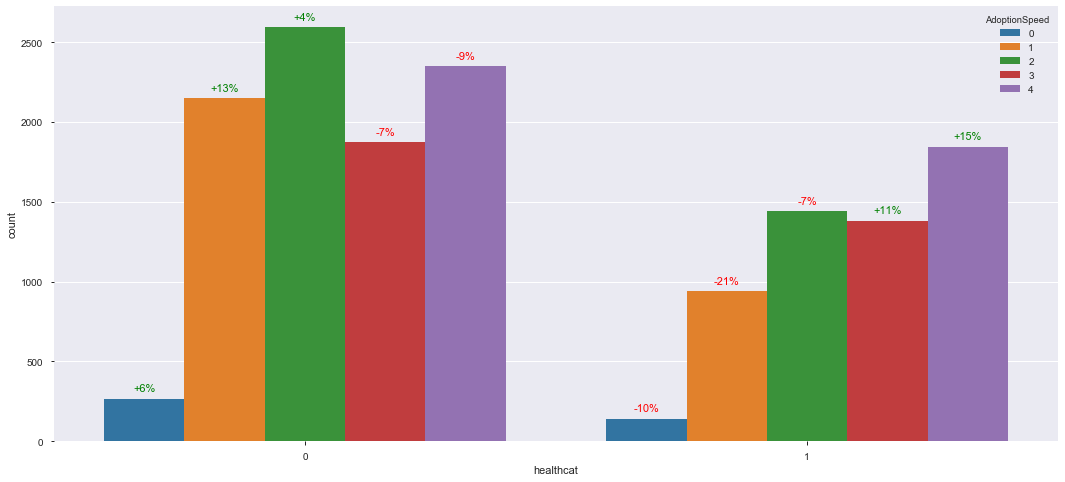

In [136]:
df['healthcat'] = hca_ward.labels_
plt.figure(figsize=(18, 8));
make_count_plot(df=df, main_count = main_count, x='healthcat', title='healthcat')

So we that we were able to create two classes in a single feature, that give a good discrimination of the target.

### 0.2.10 State

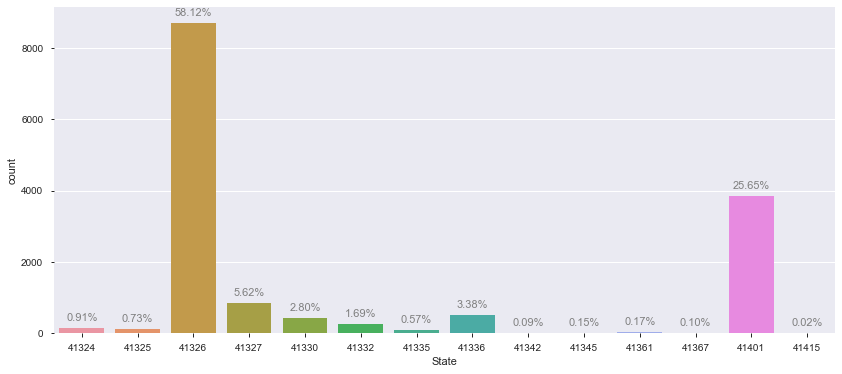

In [88]:
make_bar_chart(df['State'])

We see that one state has 58.12% of the counts, so let's group by that state agaist all the others

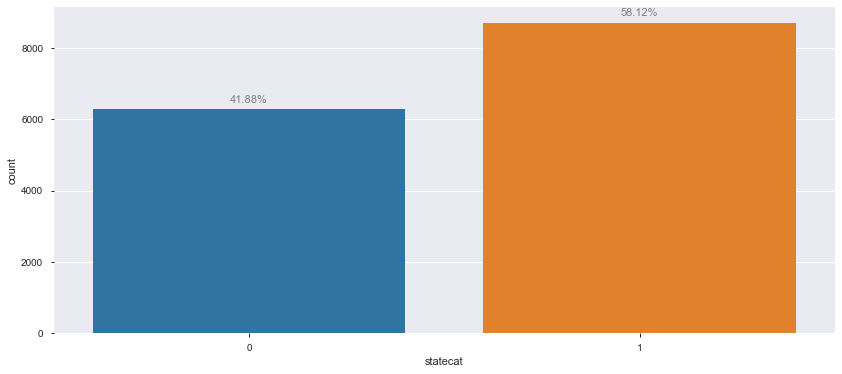

In [89]:
df['statecat'] = 0
df.loc[df.State == 41326, 'statecat'] = 1
make_bar_chart(df['statecat'])

So the feature State is now binned in two categories:
* 0 - Other States
* 1 - Selangor State

<Figure size 936x576 with 0 Axes>

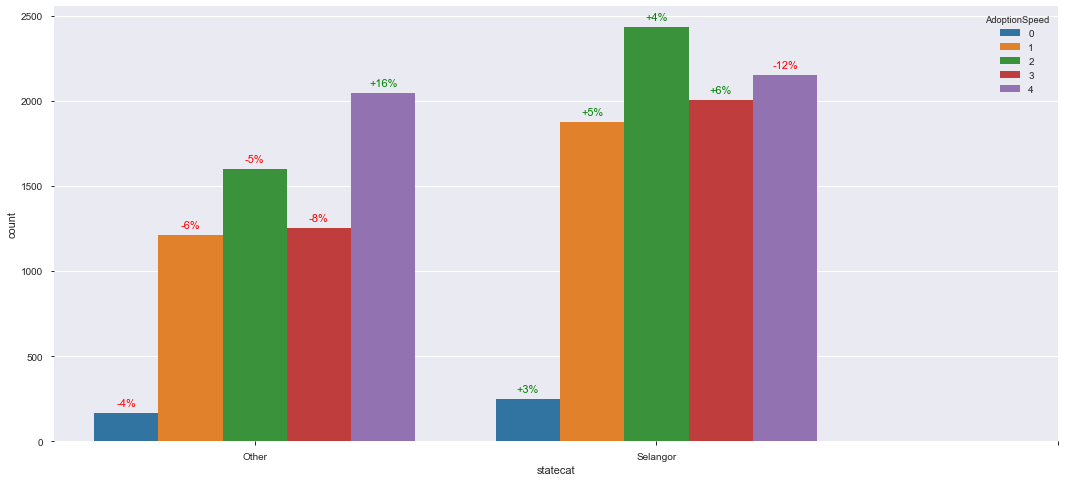

In [137]:
plt.figure(figsize=(13, 8));
make_count_plot(df=df, main_count = main_count,x='statecat', title='if pets in Selangor')
plt.xticks([0, 1, 2], ['Other', 'Selangor']);

It's observable that pets in Selangor state are more likely to be adopted that in other states

### 0.2.12 Fur Length

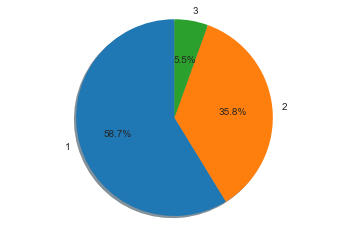

In [91]:
make_pie(df['FurLength'])

<Figure size 1296x576 with 0 Axes>

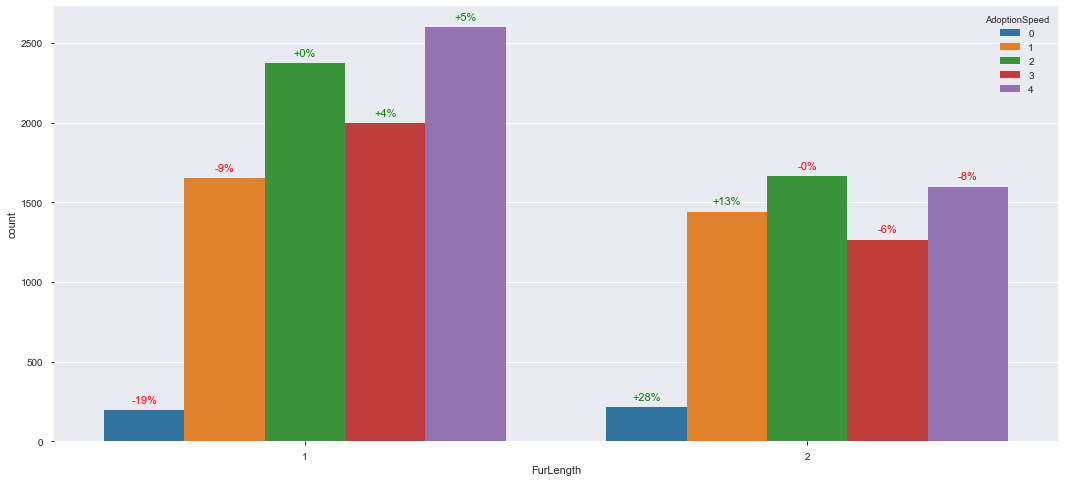

In [138]:
plt.figure(figsize=(18, 8));
make_count_plot(df=df, main_count=main_count, x= 'FurLength')

We can see that class 2 and 3 discriminate da target from class one, between adopted and not adopted. Since class 3 only has 5 % of the counts, and it's similar in nature with class 2 we will join them

<Figure size 1296x576 with 0 Axes>

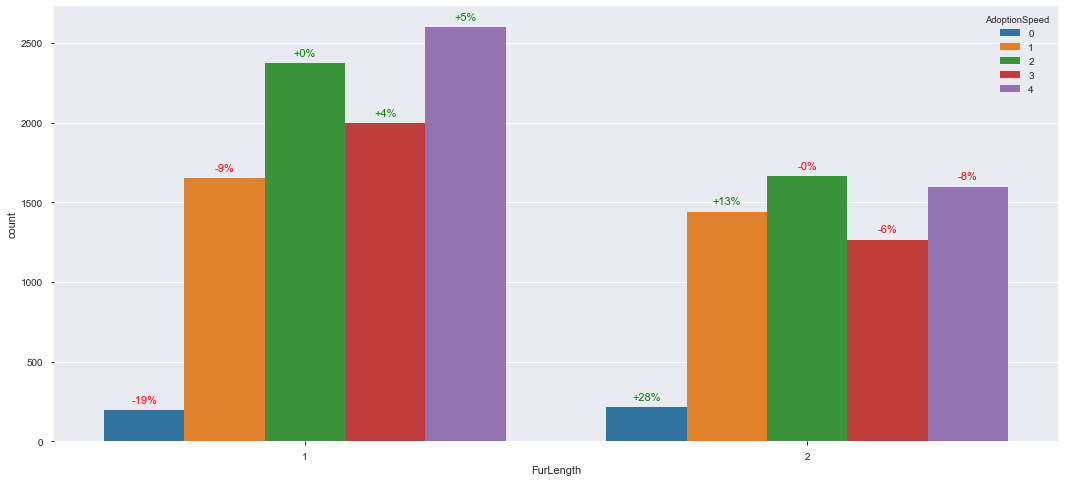

In [140]:
df.loc[df.FurLength == 3, 'FurLength'] = 2
plt.figure(figsize=(18, 8));
make_count_plot(df=df, main_count=main_count,x= 'FurLength')

We can conclude that pets with shorter hair (medium and short) are more adopted then pets with long hair

### 0.2.13 Maturaty Size

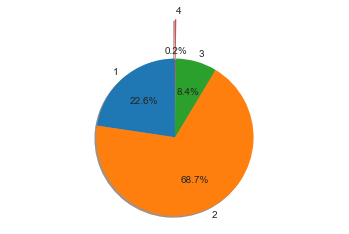

In [94]:
make_pie(df['MaturitySize'])

It can be observed that extra large pets are very rare for this reason extra large pets will be considered large pets. 

There are mostly medium size pets. 

<Figure size 1296x576 with 0 Axes>

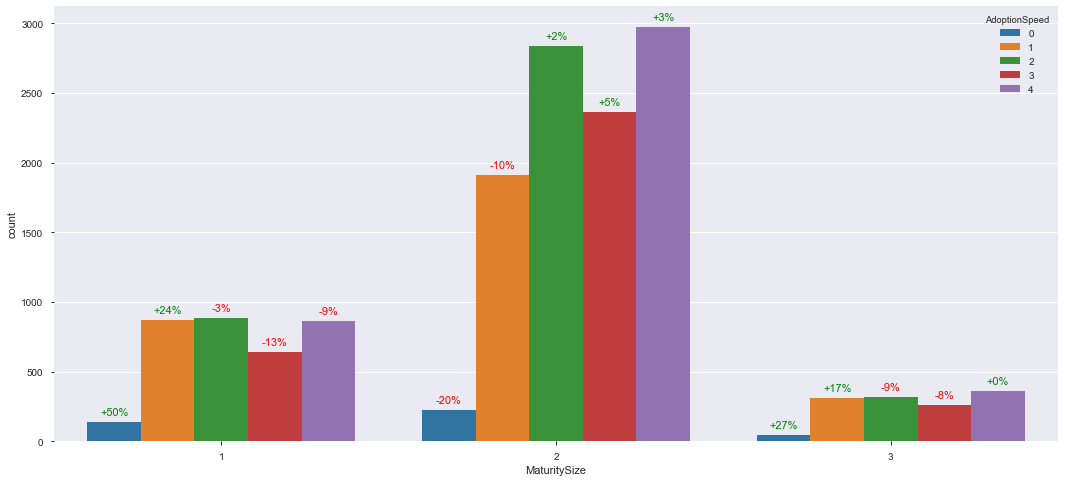

In [141]:
df.loc[df.MaturitySize == 4, 'MaturitySize'] = 3
plt.figure(figsize=(18, 8));
make_count_plot(df=df, main_count=main_count, x= 'MaturitySize')

We can see that medium pets are less, likely to be adopted that any other class. 

Given the very diferent distributions of counts, a feature with only two feature medium or not medium, which will probably better discriminate the target (adoption) will be created. And them one of this feature will be chosen trought a univariate selection aproach with the `SelectKBest` algorithm.

<Figure size 1296x576 with 0 Axes>

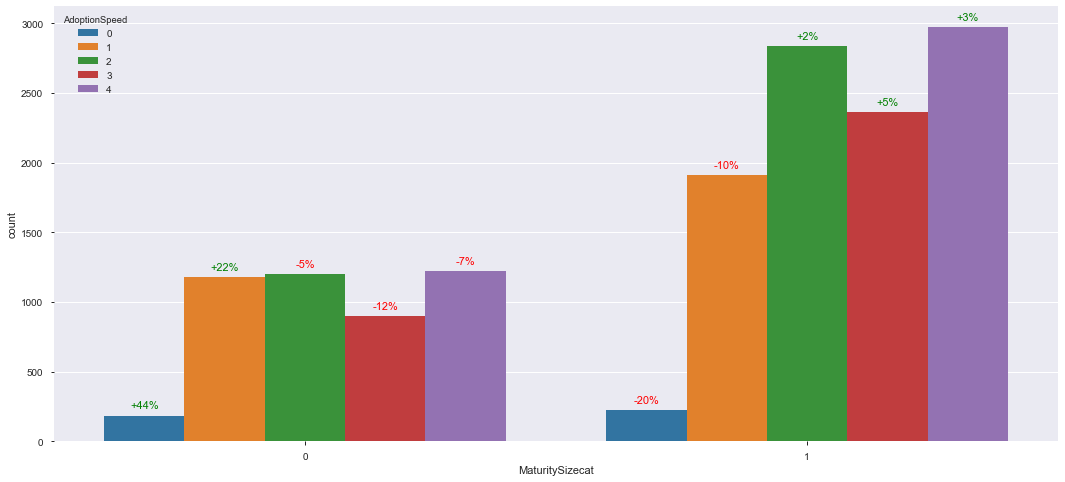

In [142]:
df['MaturitySizecat'] = 0
df.loc[df.MaturitySize == 2, 'MaturitySizecat'] = 1
plt.figure(figsize=(18, 8));
make_count_plot(df=df, main_count=main_count,x= 'MaturitySizecat')

This feature discriminates very well the target using only a binary value, medium size or not medium size.

Let's test with `SelectKBest` algorithm, using the chi-squared distribution since we are dealing with two categorical variables. (that are not all binary, or else fisher score could also be an option)

In [97]:
len(df)

14993

In [98]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Create list of features
a1 = list(df['MaturitySizecat'].values)
a2 = list(df['MaturitySize'].values)
X = [a1, a2]
X = np.array(X)
X = np.transpose(X)
# Create target
y = df['AdoptionSpeed'].values
# feature extractor
test = SelectKBest(score_func=chi2, k=1)
fit = test.fit(X, y)
#See best features
np.set_printoptions(precision=3)
print('Score: \n', fit.scores_)
feature = fit.transform(X)
# summarize selected features
print('Selected Feature: \n', feature)

Score: 
 [43.311  6.451]
Selected Feature: 
 [[0]
 [1]
 [1]
 ...
 [0]
 [0]
 [1]]


It's clear that the binary feature has a much higher score, for this reason, we will use this feature in our classificator. 

The reasons for this score are that not only is this feature simplier and more balanced as it can better discriminate the target.

### 0.2.11 AMT

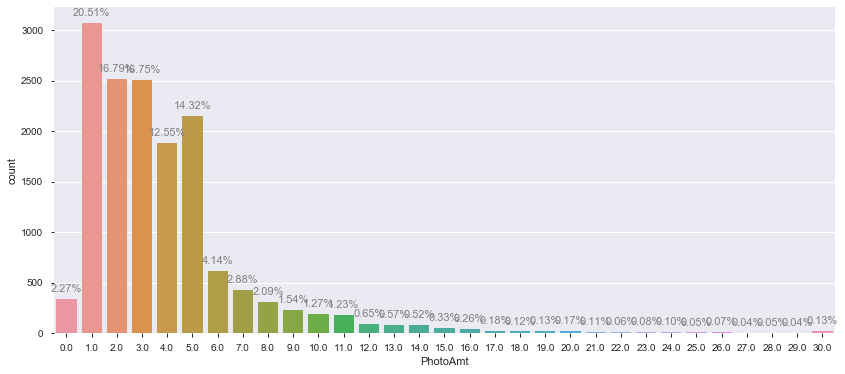

In [99]:
make_bar_chart(df['PhotoAmt'])
plt.title = ('Number of Photos')

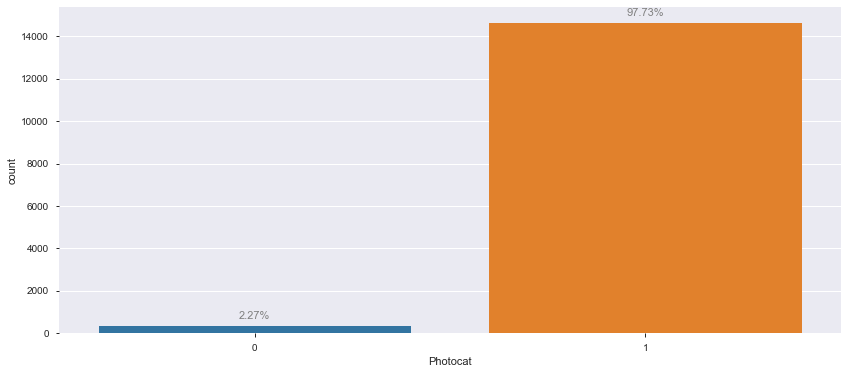

In [100]:
df['Photocat'] = pd.cut(df['PhotoAmt'], [-math.inf, 0,math.inf], include_lowest=True, labels=['0', '1'])
make_bar_chart(df['Photocat'])

<Figure size 1296x576 with 0 Axes>

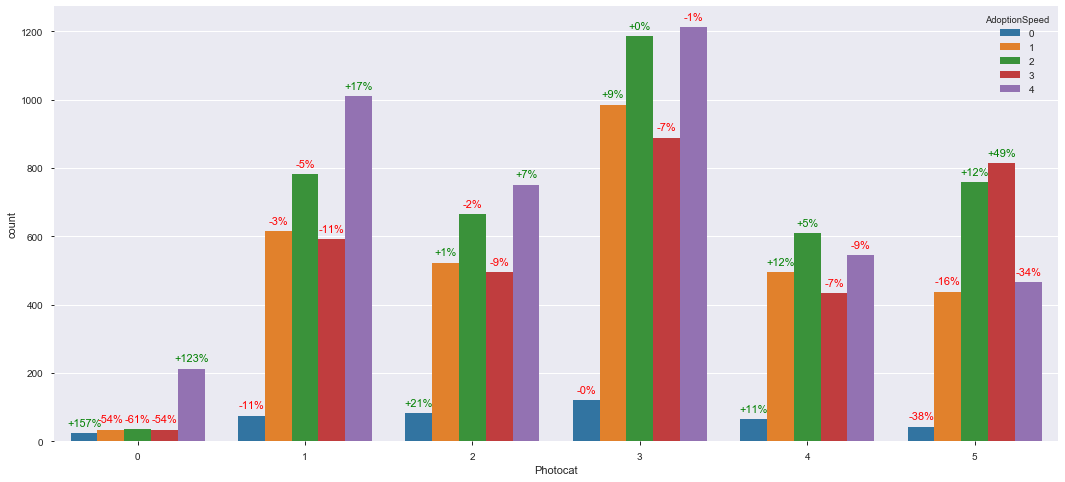

In [143]:
plt.figure(figsize=(18, 8));
make_count_plot(df=df, main_count=main_count,x='Photocat')

We don't see the expect difference between pets with no photo, and pets with photo. That probably has to be with a very low count of pets without photos

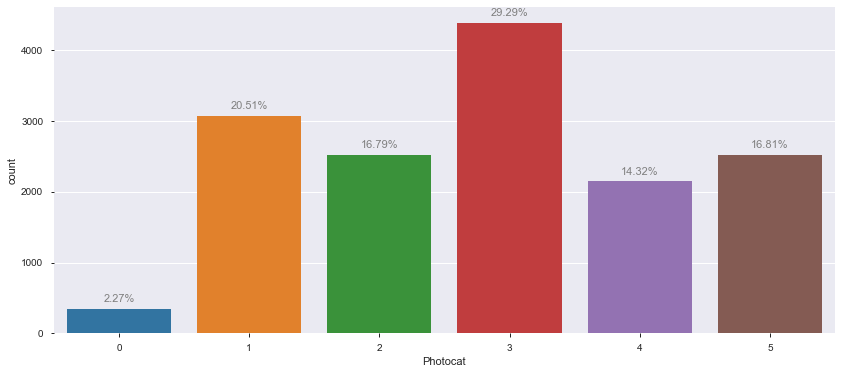

In [102]:
#Create photo categories
#Enconding
#0 = 0, 1-2 = 1, 2-4 = 2, 4-5 = 3, 5-inf = 4
#guarantee similar percentages in all categories to balance photo number
df['Photocat'] = pd.cut(df['PhotoAmt'], [-math.inf, 0, 1, 2, 4, 5, math.inf], include_lowest=True, labels=['0', '1', '2','3','4', '5'])
make_bar_chart(df['Photocat'])

<Figure size 1296x576 with 0 Axes>

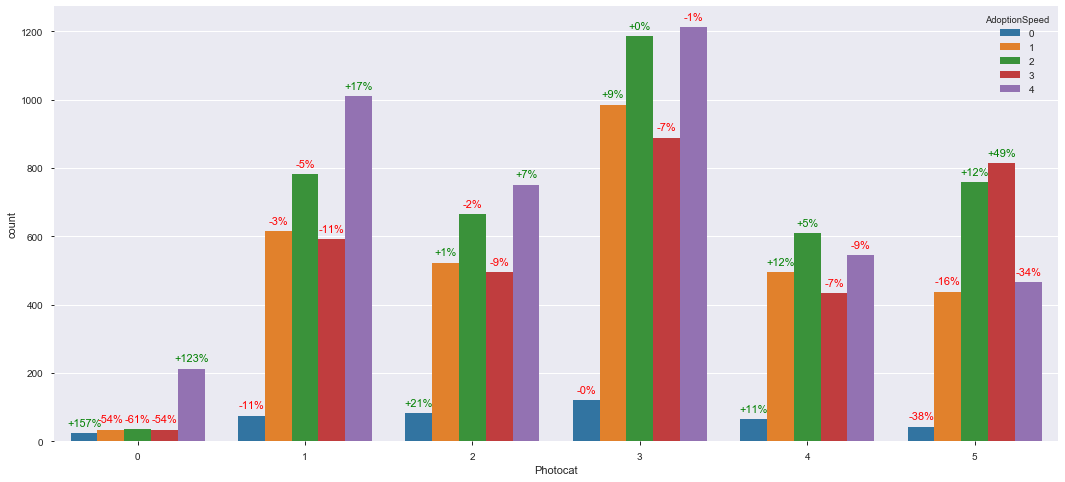

In [144]:
plt.figure(figsize=(18, 8));
make_count_plot(df=df, main_count=main_count,x='Photocat')

This bins don't seen to cleary separate the data, or present a great deal of information regarding adoption. For this reason will probably be excluded from the training set.

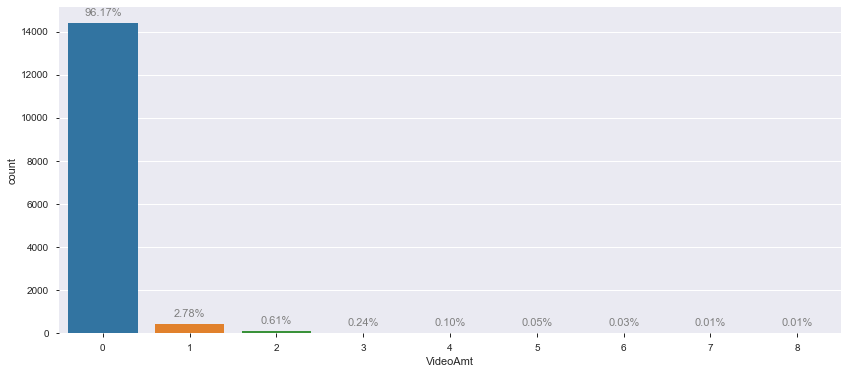

In [104]:
make_bar_chart(df['VideoAmt'])
plt.title = ('Number of Videos')

<Figure size 1296x576 with 0 Axes>

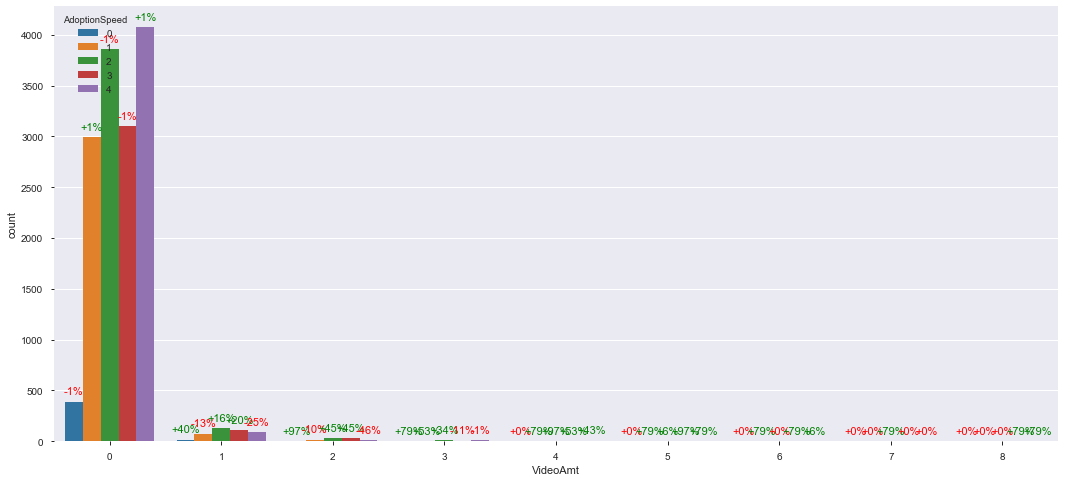

In [145]:
plt.figure(figsize=(18, 8));
make_count_plot(df=df, main_count=main_count,x='VideoAmt')

The `VideoAmt` feature has to many zeros to be used, and it dosen't seen to have any information that would help the algoritm descriminate better, for this reason, we will exclude this feature.

### 0.2.14 *Quantity*

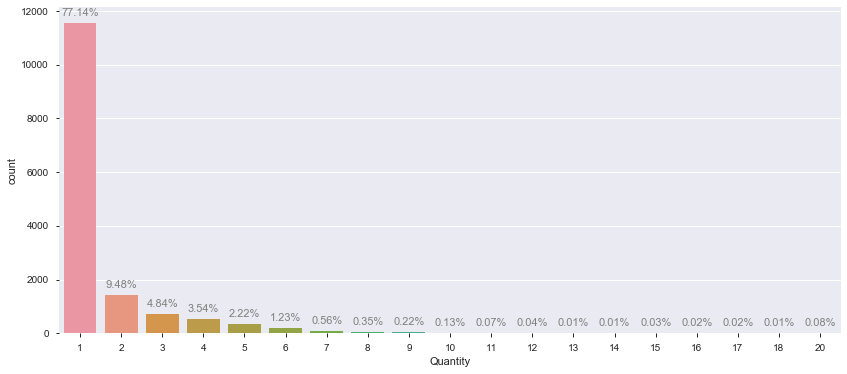

In [106]:
make_bar_chart(df['Quantity'])

Most add's have only one pet, let's create a binary feature one/multiple pets

<Figure size 1296x576 with 0 Axes>

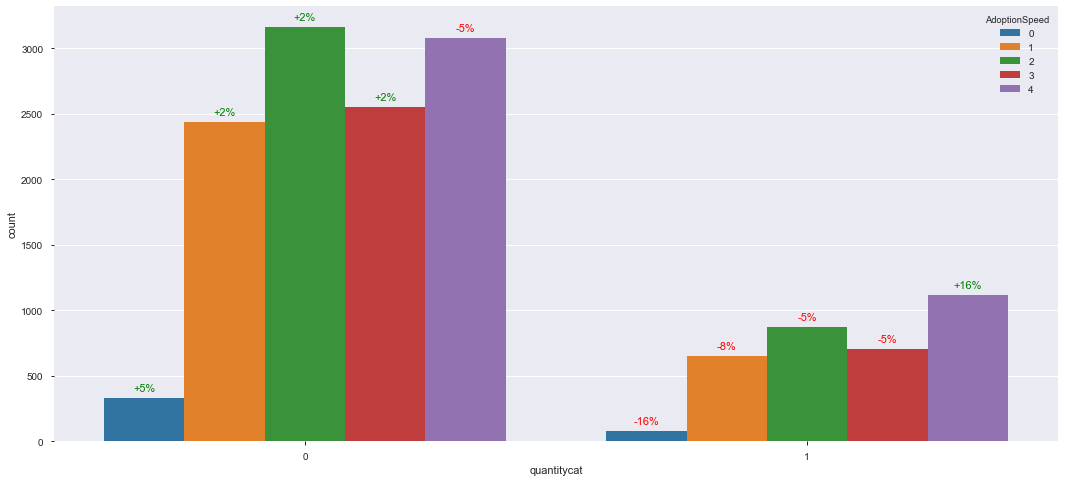

In [149]:
df['quantitycat'] = 1
df.loc[df.Quantity == 1,'quantitycat'] = 0
plt.figure(figsize=(18, 8));
make_count_plot(df, main_count=main_count,x='quantitycat')

An add with just one pet, as expected seens to have more chances of adoption.

### 0.2.15 Fee

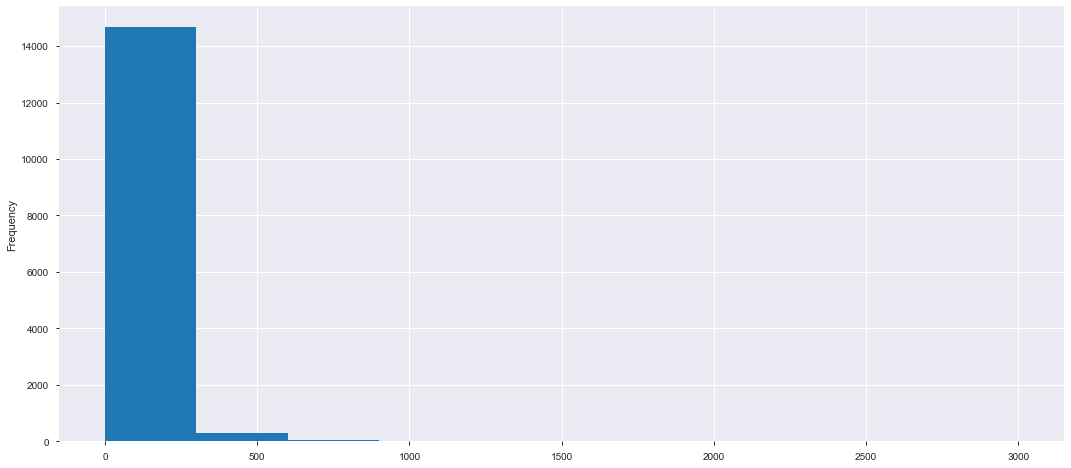

In [108]:
plt.figure(figsize=(18, 8));
df['Fee'].plot('hist', label='train', bins=10)

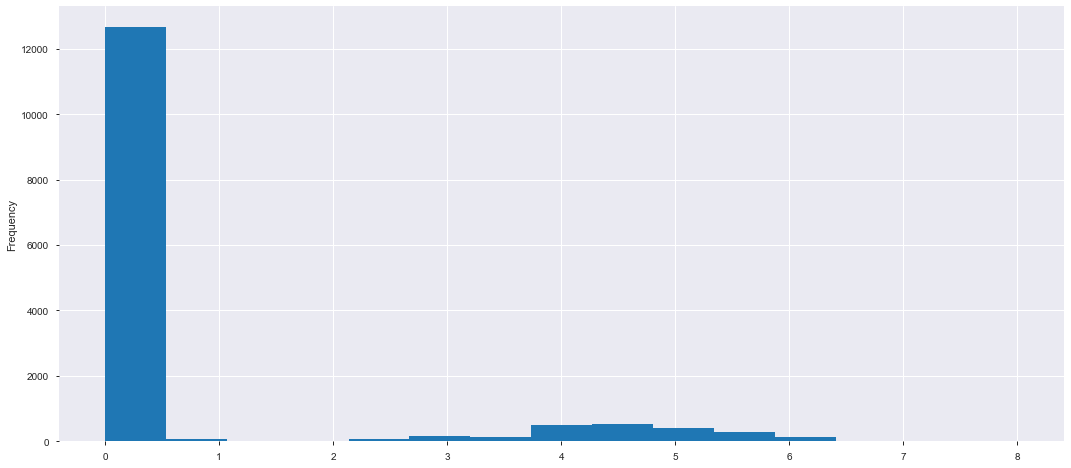

In [109]:
#Log
plt.figure(figsize=(18, 8));
np.log1p(df['Fee']).plot('hist', label='train', bins=15)

Most pets seem to be free, let's create a binary feature paid/not paid

<Figure size 1296x576 with 0 Axes>

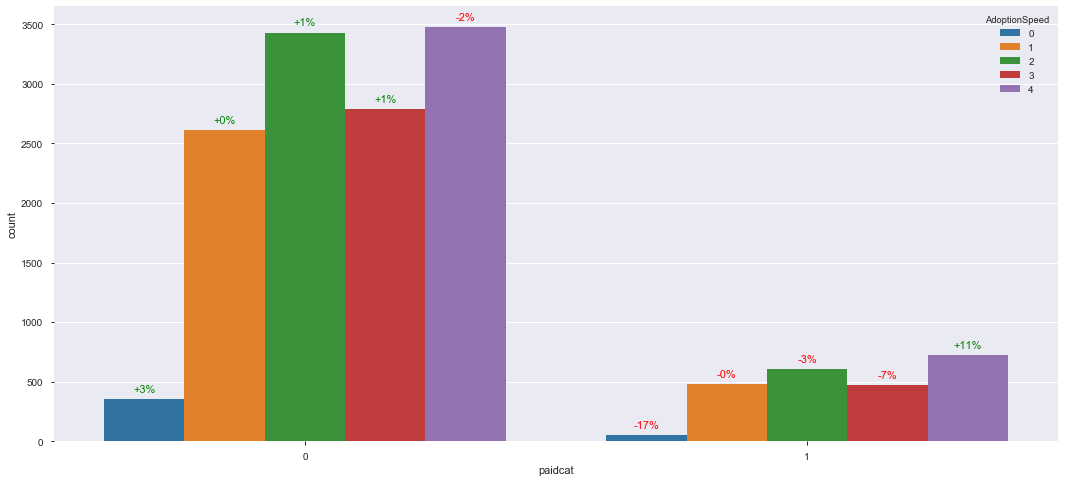

In [150]:
df['paidcat'] = 0
df.loc[df.Fee != 0,'paidcat'] = 1
plt.figure(figsize=(18, 8));
make_count_plot(df, main_count=main_count, x='paidcat')

Paid pets seem to a bit less adopted them free ones.

### 0.2 Remarks

## 0.3 Target Imbalance Correction 

As we seen during the previous section, our multi class target (`Adoption Speed`) is imbalanced, with the 0 class happening only 2,5 % of the times. 

To correct this imbalence we will use a mixture of under and over sampling tecniques, choosen with the proprerties of our dataset in mind following this bibliografy:

* At, E., Aljourf, M., & Shoukri, M. (2017). Classification of Imbalance Data using Tomek Link ( T-Link ) Combined with Random Under-sampling ( RUS ) as a Data Reduction Method Technology & Optimization. Global Journal of Technology & Optimization, 1–11. https://doi.org/10.4172/2229-8711.S1

* Hall, L. O., Kegelmeyer, W. P., Chawla, N. V., & Bowyer, K. W. (2002). SMOTE: Synthetic Minority Over-sampling Technique Nitesh. Journal of Artificial Intelligence Research, (Sept. 28), 321–357. https://doi.org/10.1613/jair.953
* Under-sampling — imbalanced-learn 0.5.0 documentation. (n.d.). Retrieved December 6, 2019, from https://imbalanced-learn.readthedocs.io/en/stable/under_sampling.html
* Resampling strategies for imbalanced datasets | Kaggle. (n.d.). Retrieved December 6, 2019, from https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets#t7

In [163]:
# Get index of all not features
l = ['Type', 'Gender', 'FurLength']
del_cols = [i for i, col in enumerate(df.columns) if 'cat' not in col and col not in l]
# Get all features
cols = [[i, col] for i, col in enumerate(df.columns) if 'cat' in col or col in l]
# Create list of features
X = df.values
length = X.shape[1]
X = np.delete(X,del_cols,axis=1)
#Create target
y = df['AdoptionSpeed']
# Check correct number of cols were deleted
if length - len(del_cols) == X.shape[1]:
    print('Check')

Check


Mixture of under sampling and over sampling:
1. `SMOTE` Funcion 
2. `Tommek Links` Function

The `SMOTE` function will generate new data points in the minority categorie, based on points that were already in the dataset. Subsequentialy the throught the `Tommek Links` tecnhique data points from other classes that are very close to the minority class will be deleted, allowing the algoritms to discriminate this class better and eliminate redundancies

Since we are working with categorical data, special attencion must be given to using distance based tecniques. But since our feature are only binary or have a distance relation that it's not a problem. Unfortunately our original features do not share this properties and so cannot be balanced using this tecniques, which might impair future comparisons that we wish to do.

In [164]:
from imblearn.combine import SMOTETomek
#Aplly under and over sampling
smt = SMOTETomek()
X_smt, y_smt = smt.fit_sample(X, y)

In [165]:
#Construct feature dataframe and target array
Dx = pd.DataFrame(data=X_smt, columns=np.transpose(cols)[1])
y = y_smt

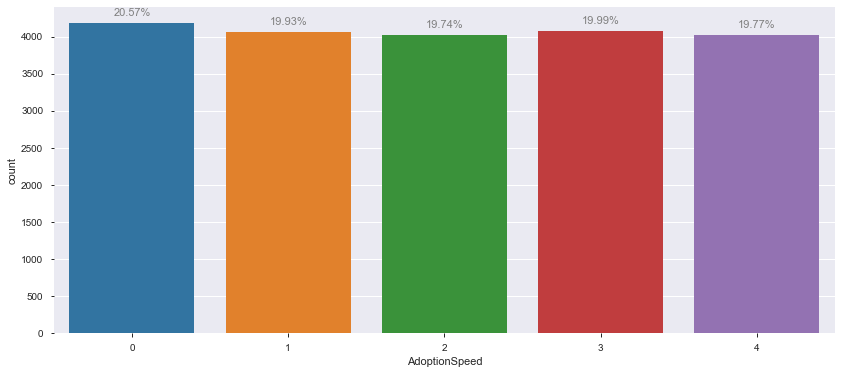

In [166]:
#Plot new target balance
make_bar_chart(y)

We can see that the imbalance in our dataset was corrected, but since we used distance based tecniques they generated `float` values so we need to correct that in our dataset.

In [167]:
#First round all values
Dx = Dx.round(0)
#Second change type
Dx = Dx.astype(int)
Dx

Type  Gender  FurLength  agecat  breedcat  namecat  descriptcat  \
0         2       1          2       0         0        0            0   
1         1       1          2       0         0        0            0   
2         1       2          1       2         0        1            0   
3         2       2          1       2         2        0            0   
4         2       1          2       3         0        0            1   
...     ...     ...        ...     ...       ...      ...          ...   
20368     2       1          1       2         2        1            0   
20369     1       2          1       2         0        0            0   
20370     1       2          2       1         0        0            0   
20371     2       2          1       3         2        0            0   
20372     1       2          2       2         0        0            0   

       colorcat  colorcat2  healthcat  statecat  MaturitySizecat  Photocat  \
0             1          1          0         0                1         2   
1             1          1          1         1                1         5   
2             1          1          1         0                1         5   
3             1          0          0         1                1         2   
4             0          1          0         1                1         3   
...         ...        ...        ...       ...              ...       ...   
20368         1          0          0         1                1         3   
20369         2          1          0         1                1         1   
20370         1          1          0         1                1         3   
20371         2          1          0         0                1         1   
20372         1          1          1         1                1         2   

       quantitycat  paidcat  
0                0        0  
1                0        0  
2                0        1  
3                0        0  
4                0        1  
...            ...      ...  
20368            0        0  
20369            0        0  
20370            0        0  
20371            0        0  
20372            0        0  

[20373 rows x 15 columns]

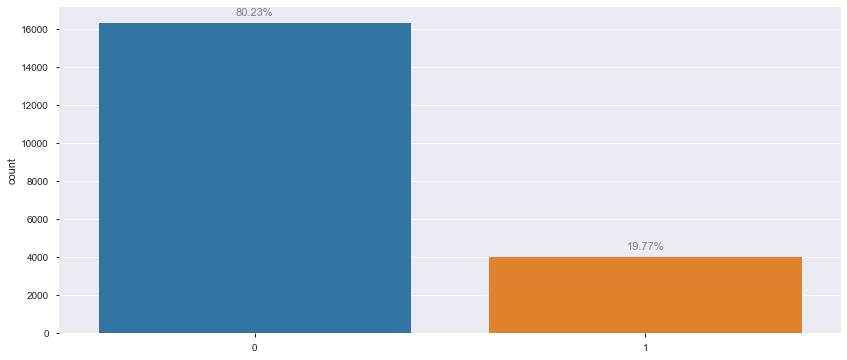

In [168]:
#Create binary balanced target
binary_y=[]
for i in y:
  if i == 4:
    binary_y.append(1)
  else:
    binary_y.append(0)
make_bar_chart(np.array(binary_y))

## 0.4 General Feature Selection


### 0.4.1 Univariate Analysis

In [169]:
# feature extractor
test = SelectKBest(score_func=chi2, k='all')
fit = test.fit(Dx, y)
#Create dict with colums and score
scores = {}
for i in range(len(cols)):
  scores.update({cols[i][1] : round(fit.scores_[i],2)} )
#Sort and print
print('Scores:')
scores2 = sorted(scores, key=scores.get, reverse=True)
for line in scores2:
        print (line,': ',scores[line])
#feature = fit.transform(X)
# summarize selected features
#print('Selected Feature: \n', feature)

Scores:
agecat :  808.28
breedcat :  453.04
Photocat :  304.72
healthcat :  159.72
MaturitySizecat :  157.16
descriptcat :  97.22
quantitycat :  86.08
Type :  81.59
statecat :  56.72
paidcat :  56.26
FurLength :  42.41
Gender :  27.6
colorcat :  21.92
colorcat2 :  15.17
namecat :  9.74


We now have an ordered list of scores for the univariate analisys of the feature's discrimitive power of the target variable `AdoptionSpeed`.

This filter method is not very accurate, since it's univariate which means that it dosen't take in to account possible multi-variable patterns and depencies, and is severely impaired by high cardinality.

Let's now compare this scores agaist the scores of the original features.



In [170]:
# Create list of original features
X2 = df.values
length = X2.shape[1]
icols = [row[0] for row in cols]
X2 = np.delete(X2,icols,axis=1)
#Create original target
y2 = df['AdoptionSpeed']
#check correct number of cols were deleted
if len(del_cols) == X2.shape[1]:
  print('Check')

Check


In [171]:
#Encode all non numeric variables
for i in range(X2.shape[1]):
  if type(X2[:, i][0]) is str:
    X2[:, i] = np.array([str(line) for line in X2[:, i]])
    X2[:, i] = int_encode_feature(X2[:, i])
# Delete list variables
#Error handling
while X2.shape[1] != 22:
  try:
    for i in range(X2.shape[1]):
      if type(X2[:, i][0]) is list:
        X2 = np.delete(X2,i,axis=1)
  except:
    pass

In [172]:
# feature extractor
test = SelectKBest(score_func=chi2, k='all')
fit = test.fit(X2, y2)
#Create dict with colums and score
original_scores = {}
del_cols2 = [col for col in df.columns if 'cat' not in col and col not in l]
for i in range(len(cols)):
  original_scores.update({del_cols2[i] : round(fit.scores_[i],2)} )
#Sort and print
print('Scores:')
original_scores2 = sorted(original_scores, key=original_scores.get, reverse=True)
for line in original_scores2:
        print (line,': ',original_scores[line])
#feature = fit.transform(X)
# summarize selected features
#print('Selected Feature: \n', feature)

Scores:
Name :  19203.98
Breed2 :  6714.06
Age :  6338.2
Breed1 :  2991.32
Fee :  267.81
Quantity :  99.74
Color2 :  59.12
Color1 :  47.43
Color3 :  25.18
Sterilized :  20.18
Vaccinated :  17.08
Dewormed :  15.07
MaturitySize :  6.45
State :  1.06
Health :  0.85


We are able to see that the features with best scores are non categorical, and due to their high cardinality are miss scored by the `chi2` scoring function.

Due to the fact that we are comparing mostly binary features with features that have a very high cardinality this method cannot be used to accuratly test if we made an improvement on the original features.

The only way to accuraly test this improvement will be through model training and testing since all other methods are very influenced by high cardinallity, and we are comparing results from balanced data and results of unbalanced data.

### 0.4.2 Importance Analysis (Random Trees)

In [173]:
X_train,X_test,y_train,y_test = train_test_split(Dx,y,test_size=0.3)
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
sel = SelectFromModel(clf)
sel.fit(X_train, y_train)
selected_feat= X_train.columns[(sel.get_support())]
print(selected_feat)

0.5530104712041884
Index(['Gender', 'agecat', 'colorcat', 'Photocat'], dtype='object')


We can see above the inicial features selected by the model, and it's accuracy which is very low.

Now let's permute this set of features and calculate the feature importance. This metric is calculate by how much shufling a certain feature's values affects the model hability to make correct predictions.

In [174]:
result = PermutationImportance(clf, random_state=42).fit(X_train, y_train)
eli5.show_weights(result, feature_names = X_train.columns.tolist())

This result more or less resembles what we optain with the filter method.

This method his also impaired by features with high cardinality, since any tree model gives preference to features with this properties.

But the main reason this results should be looked with skepticism is the acuracy of the model, which is very low, 50% accuracy is pure look, is nothing more then a coin flip.

### 0.4.3 Multicollinearity Analysis

The Multicollinearity Analysis allows to check for correlations within the features. If features are correlated that will impair the model, and lead to decision bias. 

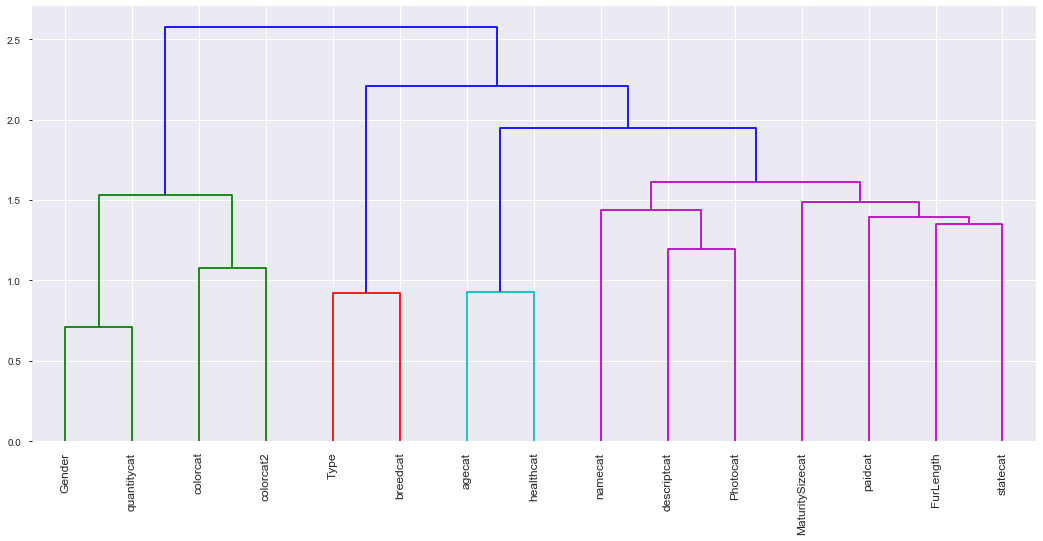

In [175]:
corr = spearmanr(Dx).correlation
corr_linkage = hierarchy.ward(corr)
plt.figure(figsize=(18, 8));
dendro = hierarchy.dendrogram(corr_linkage, labels=Dx.columns,
                              leaf_rotation=90)
dendro_idx = np.arange(0, len(dendro['ivl']))
plt.show()

From the chart above we can suppose that our model should use four features, each from a diferent cluster. Since features on the some cluster are to dependent on each other to add any new information.

The clusters also helps understand our features and how they relate, must cluster have features, that if grouped by a human using organization logic, would be grouped together. For example the blue cluster has only health information since age greatly influences health, and the other features are grouped in a single feature. The red cluster is also a good example, since breeds are obviasly correlated with the pet type. 

### 0.4. Remarks

Our filter method generated the following feature scores:

* agecat :  822.65
* breedcat :  451.99
* Photocat :  320.62
* healthcat :  163.96
* MaturitySizecat :  151.59
* descriptcat :  98.43
* quantitycat :  89.76
* Type :  72.29
* paidcat :  62.95
* statecat :  50.72
* FurLength :  39.19
* Gender :  25.55
* colorcat :  16.83
* namecat :  13.17
* colorcat2 :  10.95

Our Importance method considered the foloowing features importante:

* 0.4206 ± 0.0089	agecat
* 0.3302 ± 0.0059	Photocat
* 0.2371 ± 0.0063	colorcat
* 0.2345 ± 0.0049	MaturitySizecat
* 0.2329 ± 0.0039	Type
* 0.2272 ± 0.0063	breedcat
* 0.2176 ± 0.0035	Gender
* 0.2153 ± 0.0023	FurLength
* 0.2066 ± 0.0030	statecat
* 0.2007 ± 0.0048	healthcat
* 0.1587 ± 0.0033	namecat
* 0.1316 ± 0.0027	colorcat2
* 0.1075 ± 0.0022	quantitycat
* 0.0843 ± 0.0049	paidcat
* 0.0575 ± 0.0016	descriptcat

Multicolinearity clusters:

> Gender, Quantitycat, Colorcat, Colorcat 2

> Type, Breedcat

> Agecat, Healthcat

> Namecat, Descriptcat, Photocat, MaturitySizecat, Statecat, FurLength, Paidcat

We can probably assume that our final model will use 4 features, and that features like agecat, photocat, colorcat and breedcat will have some importance in any model's hability to predict our target.

We also observe that none of our general feature selection methods are very good at dealing with multicolinear features, so it's important to guarantee that our final model uses at least one feature from every cluster.

Good comparisons between the original and the new features were not possible at this stage do to the severe limitations of this general selection methods.

We think that model specific selection methods like RFE and embeded methods might prove better at feature selection.

## 0.5 Cross-Validation

> In truth most of the generalized methods we are applying should be apllied individualy for each target, and maybe even to every classifier. But since time constrains don't permit this sort of analysis, in this project we will use `StratifiedKFold`, since it guarantes that the data in each fold is well distributed, with 10 K-Folds, which is the default number of folds for large data-sets.

> The K-folds selection process could be improved using more a more complex analysis, but yet again time constrains don't permit us to get into this.

# Ending EDA Notebook

Results will be exported trought CSV

In [183]:
#Create balanced dataset csv
Dx['Target'] = y
Dx.to_csv('Balanced_Dataset.csv')
#Create binary target dataset csv
Bx = pd.DataFrame(data=X, columns=np.transpose(cols)[1])
Bx['Target'] = df['Adoption']
Dx.to_csv('Binary_Dataset.csv')

# Task 2 (Unsupervised Learning) - Charactering Adopted Pets and Adoption Speed

In this task you should **use unsupervised learning algorithms and try to characterize pets that were actually adopted and their adoption speed**. You can use:
* **Association rule mining** to find **associations between the features and the target Adoption/AdoptionSpeed**.
* **Clustering algorithms to find similar groups of pets**. Is it possible to find groups of pets with the same/similar adoption speed.
* **Be creative and define your own unsupervised analysis!** What would it be interesting to find out ?

## 2.1. Preprocessing Data for Association Rule Mining

...

## 2.2. Finding Associations

...

## 2.3 Association Rules - Results and Discussion 

...

## 2.4. Preprocessing Data for Clustering

...

## 2.5. Finding Groups

...

## 2.6. Clustering - Results and Discussion 

...

# 3. Final Comments and Conclusions

...